In [16]:
import os
import pandas as pd
import mne 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading valence data

In [17]:
def find_valence(x):
    if x>=5:
        return 1
    return 0

#All subjects` valence data in one file valence.txt
all_valence_data = pd.read_csv(r'./valence/valence.txt',delimiter='\t')
all_valence_data['target'] = all_valence_data['valence'].apply(find_valence)
all_valence_data.head()

,subject_id,TimeIndex,mp4,valence,target
0,02wxw,0.770543981,1.mp4,8,1
1,02wxw,0.770717593,13.mp4,2,0
2,02wxw,0.770914352,4.mp4,3,0
3,02wxw,0.771076389,19.mp4,4,0
4,02wxw,0.771261574,15.mp4,1,0


In [20]:
print(all_valence_data.columns)

Index(['subject_id', 'TimeIndex', 'mp4', 'valence', 'target'], dtype='object')


### Reading EEG data

for subject **02wxw** :

In [21]:
epochs=mne.io.read_epochs_eeglab(r'./EEG/02wxw_epoched.set').set_eeg_reference('average').apply_baseline(baseline=(-0.5,0))


Extracting parameters from e:\4.5 semester\sepide hajipoor\VREED\EEG\02wxw_epoched.set...
Not setting metadata
111 matching events found
No baseline correction applied
0 projection items activated
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Applying baseline correction (mode: mean)


In [22]:
_02wxw_EEG = epochs.crop(0,3.999).get_data()

_02wxw_valence = all_valence_data[all_valence_data['subject_id'] == '02wxw']['valence']


In [23]:
# epochs * EEG channels * time points
print(f'number of epochs : {_02wxw_EEG.shape[0]}\n\
number of EEG channels : {_02wxw_EEG.shape[1]}\n\
number of time points : {_02wxw_EEG.shape[2]}')

number of epochs : 111
number of EEG channels : 59
number of time points : 4000


In [24]:
#        EEGdata                                          valence
#
#    _02wxw_EEG[0,:,:] <--------------> _02wxw_valence[0]
#    _02wxw_EEG[1,:,:] <--------------> _02wxw_valence[1]
#                                      ... ....
#     _02wxw_EEG[n,:,:] <--------------> _02wxw_valence[n]

print(_02wxw_valence.shape)
print(list(_02wxw_valence[0:10]))

(111,)
[8, 2, 3, 4, 1, 1, 8, 5, 4, 2]


In [25]:
print(_02wxw_EEG[0,0,:])      # epoch 1, channel 1 

[ 9.19676694e-06  8.72775200e-06  8.36529154e-06 ... -1.31294809e-06
 -1.82278195e-06 -2.29766954e-06]


Text(0.5, 1.0, 'epoch 1, channel 1')

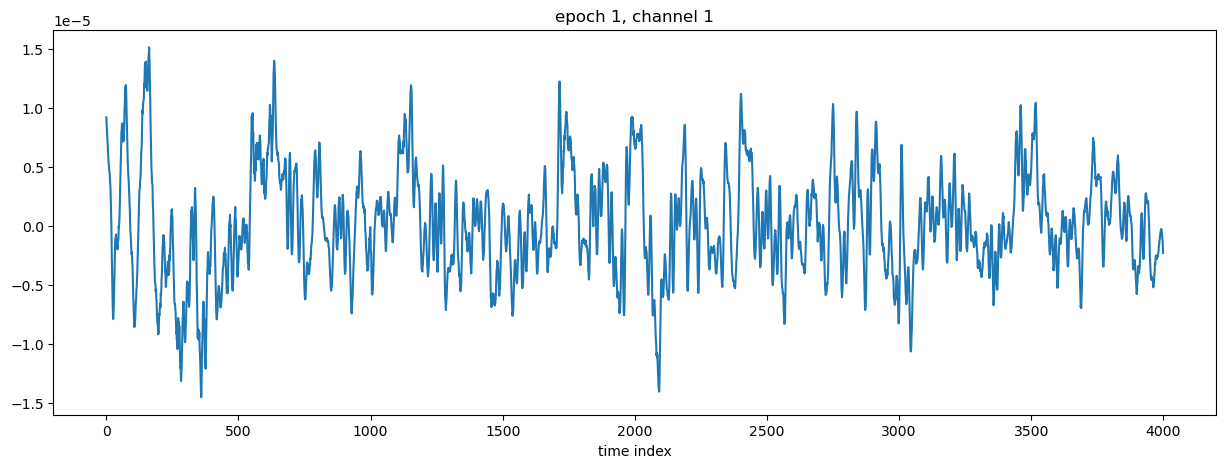

In [26]:
plt.figure(figsize=(15,5))
plt.plot(_02wxw_EEG[0,0,:])
plt.xlabel('time index')
plt.title('epoch 1, channel 1')

## Feature extraction

In [27]:
epochs[0:4]

Number of events,4
Events,0: 1255: 3
Time range,0.000 – 3.999 s
Baseline,-0.500 – 0.000 s


####  Extract PSD features 


In [28]:
psds = mne.Epochs.compute_psd(epochs, fmin=0, fmax=100)

    Using multitaper spectrum estimation with 7 DPSS windows


In [29]:
psds.shape

(111, 59, 401)

#### Visualaize PSD 

Averaging across epochs...


C:\Users\Hesam\AppData\Roaming\Python\Python39\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


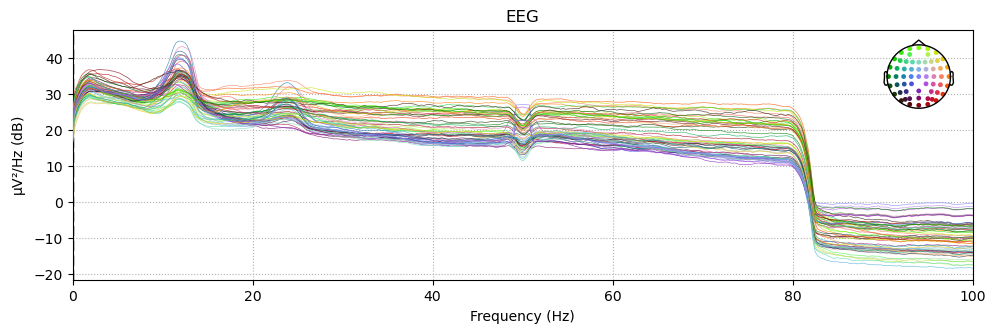

In [30]:
psds.plot(picks='eeg',exclude='bads');

psds will contain the power spectral density values for each channel.

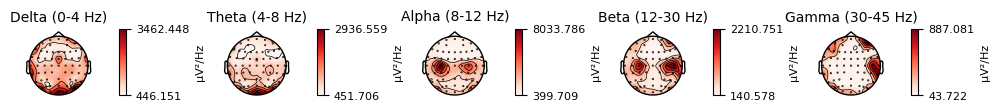

In [31]:
psds.plot_topomap();

### pick **Power Spectrum** of channel `Fz`

In [32]:
psds[0].pick_channels(['Fz',])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Epochs
Number of epochs,1
Dims,"epoch, channel, freq"
Estimation method,multitaper
Number of channels,1
Number of frequency bins,401
Frequency range,0.00 – 100.00 Hz


In [33]:
psds[0].pick_channels(['Fz',]).get_data().shape

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


(1, 1, 401)

In [34]:
mydata = np.array(psds[0].pick_channels(['Fz',]).get_data())
mydata.shape
#psds.average().shape

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


(1, 1, 401)

---

In [39]:
psds_data = psds.get_data()
mean_psds = psds_data.mean(axis=2)
mean_psds.shape

(111, 59)

#### plot average of psds for epoch 1

Text(0.5, 0, '# of channel')

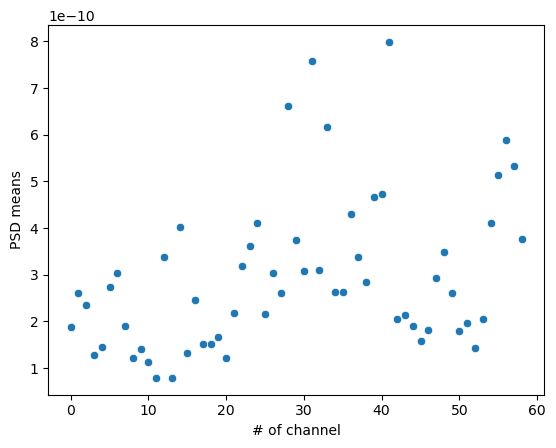

In [43]:
sns.scatterplot(x=np.arange(len(mean_psds[0])),y=mean_psds[0])
plt.ylabel('PSD means')
plt.xlabel('# of channel')


---

### pick **Power Spectrum** of channel `Fz` on  $\delta$, $\alpha$, $\beta$ and $\gamma$ frequency bands :

![pic1.png](pic1.png)

In [44]:
delta_mean_psd = psds[0].pick_channels(['Fz',]).get_data(fmin=0.5,fmax=4).mean(axis=2).squeeze()
theta_mean_psd = psds[0].pick_channels(['Fz',]).get_data(fmin=4,fmax=8).mean(axis=2).squeeze()
alpha_mean_psd = psds[0].pick_channels(['Fz',]).get_data(fmin=8,fmax=12).mean(axis=2).squeeze()
beta_mean_psd = psds[0].pick_channels(['Fz',]).get_data(fmin=12,fmax=30).mean(axis=2).squeeze()
gamma_mean_psd = psds[0].pick_channels(['Fz',]).get_data(fmin=30,fmax=100).mean(axis=2).squeeze()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [45]:
print(f'delta band psd = {delta_mean_psd}')
print(f'theta band psd = {theta_mean_psd}')
print(f'alpha band psd = {alpha_mean_psd}')
print(f'beta band psd = {beta_mean_psd}')
print(f'gamma band psd = {gamma_mean_psd}')

delta band psd = 1.8181858437905843e-09
theta band psd = 1.2183693609184013e-09
alpha band psd = 5.356726120573325e-10
beta band psd = 1.2879058746892007e-10
gamma band psd = 4.405180555963792e-11


Now, similar to the above, we extract PSD features for all epochs and form the dataset :

In [46]:
subject_IDs = all_valence_data['subject_id']
subject_IDs = np.unique(subject_IDs)
len(subject_IDs)

19

In [47]:
print(subject_IDs)

['02wxw' '03sf' '04cmm' '06zhy' '08zqh' '09hsq' '10mqk' '11cx' '12wlz'
 '13cxt' '14zyr' '15yyw' '17sh' '19hpy' '20wrq' '22wf' '23wh' '24hc'
 '25gyz']


In [48]:
def return_empty_df():
    df = psds.to_data_frame() 
    my_df0 = pd.DataFrame(columns=['valence','subject'])
    my_df = pd.DataFrame(columns=df.columns)
    my_df2 = pd.DataFrame(columns=df.columns[3:] +'_delta')
    my_df3 = pd.DataFrame(columns=df.columns[3:] +'_theta')
    my_df4 = pd.DataFrame(columns=df.columns[3:] +'_alpha')
    my_df5 = pd.DataFrame(columns=df.columns[3:] +'_beta')
    my_df6 = pd.DataFrame(columns=df.columns[3:] +'_gamma')

    my_df = pd.concat([my_df0,my_df,my_df2,my_df3,my_df4,my_df5,my_df6])
    my_df = my_df.drop(['condition','freq'],axis=1)
    return my_df

In [ ]:
my_dataset = return_empty_df()

for sbj in subject_IDs:
    path = f'./EEG/{sbj}_epoched.set' 
    epochs=mne.io.read_epochs_eeglab(path).set_eeg_reference('average').apply_baseline(baseline=(-0.5,0));
    EEG_data = epochs.crop(0,3.999).get_data()
    subject_valence = all_valence_data[all_valence_data['subject_id'] == sbj]['valence']
    
    psds = mne.Epochs.compute_psd(epochs, fmin=0, fmax=100)
    
    for epoch_index in range(len(epochs)):
        mean_psds = psds[epoch_index].get_data().mean(axis=2).squeeze()
        delta_mean_psd = psds[epoch_index].get_data(fmin=0.5,fmax=4).mean(axis=2).squeeze()
        theta_mean_psd = psds[epoch_index].get_data(fmin=4,fmax=8).mean(axis=2).squeeze()
        alpha_mean_psd = psds[epoch_index].get_data(fmin=8,fmax=12).mean(axis=2).squeeze()
        beta_mean_psd = psds[epoch_index].get_data(fmin=12,fmax=30).mean(axis=2).squeeze()
        gamma_mean_psd = psds[epoch_index].get_data(fmin=30,fmax=100).mean(axis=2).squeeze()
        
        new_row = np.array([0,00,epoch_index])
        new_row = np.hstack((new_row,mean_psds,delta_mean_psd,theta_mean_psd,alpha_mean_psd,beta_mean_psd,gamma_mean_psd))
        #print(len(new_row))
        my_dataset.loc[len(my_dataset)] = list(new_row)
        my_dataset['subject'][len(my_dataset)-1] = sbj
        
        
my_dataset['valence'] = all_valence_data['target']

In [50]:
my_dataset.head()

,valence,subject,epoch,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,...,POz_gamma,PO3_gamma,PO4_gamma,PO5_gamma,PO6_gamma,PO7_gamma,PO8_gamma,Oz_gamma,O1_gamma,O2_gamma
0,1,02wxw,0.0,1.882452e-10,2.613977e-10,2.342725e-10,1.270833e-10,1.450096e-10,2.741674e-10,3.041831e-10,...,2.544078e-11,2.454294e-11,3.318986e-11,2.982913e-11,3.486715e-11,1.226165e-10,7.876805e-11,1.921007e-10,1.707312e-10,9.583163e-11
1,0,02wxw,1.0,1.671469e-10,3.139351e-10,3.677248e-10,1.339098e-10,1.509435e-10,3.566882e-10,5.303595e-10,...,2.545782e-11,2.928772e-11,4.057309e-11,4.320864e-11,5.297054e-11,4.226461e-10,2.187757e-10,2.630759e-10,2.526730e-10,1.165207e-10
2,0,02wxw,2.0,1.414707e-10,3.369094e-10,3.104535e-10,1.169302e-10,1.518435e-10,3.604066e-10,3.707362e-10,...,2.371955e-11,2.611802e-11,3.244112e-11,3.054964e-11,3.988925e-11,1.364150e-10,1.112271e-10,2.204613e-10,1.989883e-10,9.160977e-11
3,0,02wxw,3.0,1.852999e-10,2.077472e-10,1.877499e-10,1.441438e-10,1.366574e-10,1.806031e-10,2.957313e-10,...,2.582457e-11,2.735440e-11,3.400165e-11,3.346374e-11,3.468071e-11,9.096899e-11,8.346808e-11,2.297976e-10,2.168716e-10,9.878631e-11
4,0,02wxw,4.0,1.445515e-10,2.221605e-10,2.868321e-10,1.106543e-10,1.364104e-10,2.084835e-10,4.279767e-10,...,2.333754e-11,2.631364e-11,3.576147e-11,3.297819e-11,3.843963e-11,1.785779e-10,1.415442e-10,2.670894e-10,2.486009e-10,1.133204e-10


In [52]:
my_dataset.tail()

,valence,subject,epoch,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,...,POz_gamma,PO3_gamma,PO4_gamma,PO5_gamma,PO6_gamma,PO7_gamma,PO8_gamma,Oz_gamma,O1_gamma,O2_gamma
2038,1,25gyz,108.0,1.045864e-09,1.586335e-09,1.245497e-09,1.358616e-09,7.279721e-10,1.415111e-09,6.809132e-10,...,9.381270e-12,1.783794e-11,1.580252e-11,2.105190e-11,3.195214e-11,4.853208e-11,1.040701e-10,6.600020e-11,5.027880e-11,1.729671e-10
2039,0,25gyz,109.0,1.285152e-09,1.718077e-09,1.456802e-09,1.527138e-09,1.236293e-09,1.519302e-09,9.175492e-10,...,1.090057e-11,1.823785e-11,1.533341e-11,2.447360e-11,3.402929e-11,5.007274e-11,1.005186e-10,9.032033e-11,5.652145e-11,1.639162e-10
2040,0,25gyz,110.0,1.056683e-09,1.548420e-09,1.226265e-09,1.095958e-09,8.343746e-10,1.388821e-09,6.392781e-10,...,1.129425e-11,1.813743e-11,1.512499e-11,2.433624e-11,3.482299e-11,5.664874e-11,9.698504e-11,8.120462e-11,5.393158e-11,1.496889e-10
2041,0,25gyz,111.0,1.602323e-09,2.135380e-09,1.301564e-09,1.632797e-09,9.061765e-10,1.616689e-09,7.530076e-10,...,9.605896e-12,1.653924e-11,1.516376e-11,2.479755e-11,3.146099e-11,5.053035e-11,8.917892e-11,8.216838e-11,5.368290e-11,1.527515e-10
2042,0,25gyz,112.0,1.586917e-09,1.960993e-09,1.300641e-09,1.541837e-09,9.721698e-10,1.441677e-09,5.455068e-10,...,1.176719e-11,1.607078e-11,1.576327e-11,2.112732e-11,2.889102e-11,4.594905e-11,8.007214e-11,9.968115e-11,5.345478e-11,1.525268e-10


In [53]:
print('number of feature : ',len(my_dataset.columns)-3)

number of feature :  354


In [54]:
my_dataset.to_csv('PSD_feature1_dataframe.csv', index=False) 

In [55]:
features_dataset = my_dataset.drop(['valence','subject','epoch'],axis=1)

Compute the correlation matrix :

In [56]:
corr_matrix = features_dataset.corr()

### Correlation map

##### Correlation map for first 30 feauters

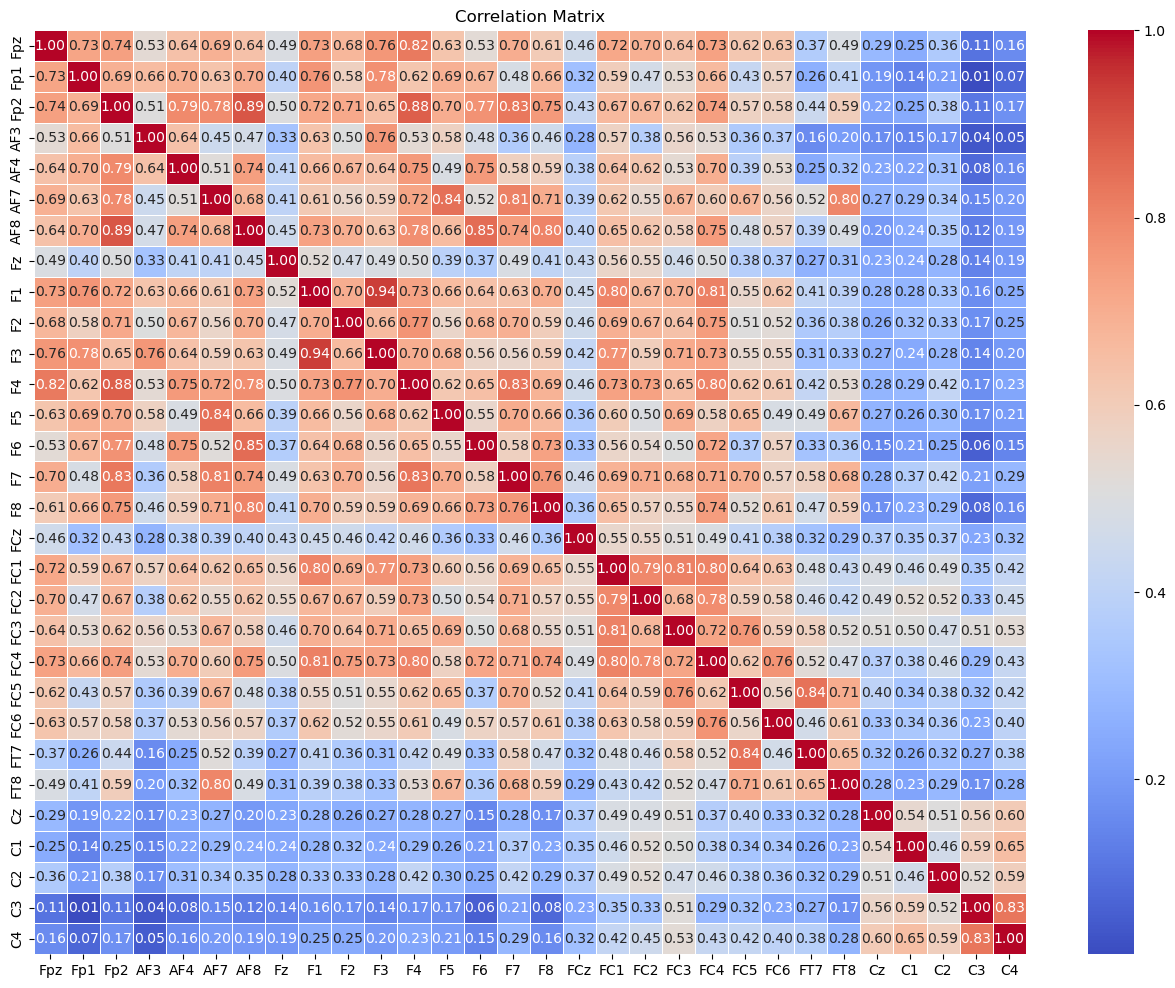

In [57]:
first_10_columns = features_dataset.iloc[:, :30]
corr_matrix = first_10_columns.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Data Normalization

In [57]:
mean_data = features_dataset.mean().mean() 
range_data = features_dataset.max().max() - features_dataset.min().min()

def df_normalizer(df):
    return ((df - mean_data)/range_data ) + 1

normal_dataset =  df_normalizer(features_dataset)
normal_dataset['valence'] = my_dataset['valence']
normal_dataset['subject'] = my_dataset['subject']
normal_dataset['epoch'] = my_dataset['epoch']


normal_dataset.tail()

,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,Fz,F1,F2,...,PO5_gamma,PO6_gamma,PO7_gamma,PO8_gamma,Oz_gamma,O1_gamma,O2_gamma,valence,subject,epoch
2038,1.002618,1.005448,1.003663,1.004255,1.000953,1.004551,1.000706,0.998377,0.999131,0.999222,...,0.997251,0.997308,0.997395,0.997686,0.997486,0.997404,0.998046,1,25gyz,108.0
2039,1.003871,1.006138,1.004770,1.005138,1.003615,1.005097,1.001946,0.998735,0.999350,0.999713,...,0.997269,0.997319,0.997403,0.997667,0.997614,0.997437,0.997999,0,25gyz,109.0
2040,1.002674,1.005249,1.003562,1.002880,1.001510,1.004414,1.000488,0.998342,0.999029,0.999120,...,0.997268,0.997323,0.997437,0.997648,0.997566,0.997423,0.997924,0,25gyz,110.0
2041,1.005532,1.008323,1.003957,1.005691,1.001886,1.005607,1.001084,0.998735,0.999754,0.999840,...,0.997270,0.997305,0.997405,0.997608,0.997571,0.997422,0.997940,0,25gyz,111.0
2042,1.005451,1.007410,1.003952,1.005215,1.002232,1.004690,0.999997,0.999075,0.999881,1.000510,...,0.997251,0.997292,0.997381,0.997560,0.997663,0.997420,0.997939,0,25gyz,112.0


## Fisher feature selection


In [58]:
from sklearn.feature_selection import SelectKBest, chi2

In [59]:
# Separate the features (X) and the target variable (y)
X = normal_dataset.drop(['valence','subject','epoch'], axis=1)
y = normal_dataset['valence']

# Perform Fisher feature selection
k = 35  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Print the selected feature names
print("Selected features:")
for feature in selected_features:
    print(feature)

Selected features:
Fp1
Fp2
AF7
Fp2_delta
AF3_delta
AF4_delta
AF7_delta
AF8_delta
Fz_delta
F2_delta
F4_delta
F6_delta
F7_delta
F8_delta
FC5_delta
FT7_delta
C1_delta
C2_delta
C4_delta
Oz_delta
O2_delta
POz_theta
Oz_theta
O2_theta
Fpz_beta
Fp1_beta
Fp2_beta
AF7_beta
AF8_beta
F5_beta
F8_beta
Fp1_gamma
Fp2_gamma
AF7_gamma
AF8_gamma


#### Correlation map for new dataset (selected feature)

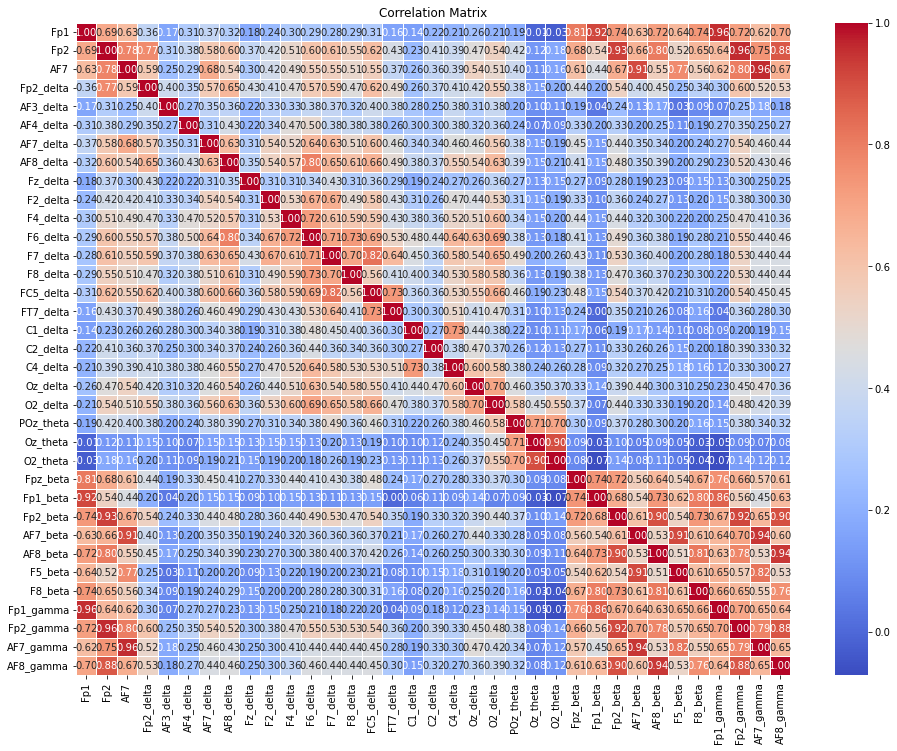

In [60]:
corr_matrix = normal_dataset[selected_features].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [61]:
reduced_dataset = pd.concat([my_dataset.iloc[:,0:3],normal_dataset[selected_features]],axis=1)
reduced_dataset.head()

,valence,subject,epoch,Fp1,Fp2,AF7,Fp2_delta,AF3_delta,AF4_delta,AF7_delta,...,Fp1_beta,Fp2_beta,AF7_beta,AF8_beta,F5_beta,F8_beta,Fp1_gamma,Fp2_gamma,AF7_gamma,AF8_gamma
0,1,02wxw,0.0,0.998509,0.998367,0.998576,1.005029,1.000948,1.002525,1.005967,...,0.999043,0.999017,0.999534,0.998976,0.999302,0.997913,0.997596,0.997557,0.997752,0.997883
1,0,02wxw,1.0,0.998785,0.999066,0.999008,1.002790,1.000452,1.001327,1.000688,...,1.000576,1.000350,1.000741,1.002364,1.001446,0.998001,0.998004,0.998362,0.998311,0.998884
2,0,02wxw,2.0,0.998905,0.998766,0.999028,1.002177,0.999820,1.002625,1.003027,...,1.000698,1.000150,1.001179,1.000552,1.000891,0.997820,0.998091,0.998127,0.998138,0.998141
3,0,02wxw,3.0,0.998228,0.998124,0.998086,1.004906,1.002114,1.003397,1.000117,...,0.998738,0.998275,0.998812,0.998443,0.999204,0.997896,0.997601,0.997457,0.997584,0.997536
4,0,02wxw,4.0,0.998304,0.998643,0.998232,1.005132,1.000995,1.001628,1.001174,...,0.998623,0.999379,0.999178,1.001049,0.998913,0.997832,0.997695,0.997867,0.997619,0.998584


In [62]:
print(f'number of feature : {len(reduced_dataset.columns)-3}')

number of feature : 35


## Classification 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

## Gaussian naive bayes clf

In [64]:
X = reduced_dataset.drop(['valence','subject','epoch'], axis=1)
y = reduced_dataset['valence']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15 ,test_size=0.3,shuffle=True) 

In [46]:
y_test[0:10].values

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

fit model :

In [47]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [48]:
naive_bayes_acc = accuracy_score(
    clf.predict(X_test),
    y_test
) 
naive_bayes_acc

0.66721044045677

Classification with GaussianNB on the dataset **without** feature selecton :

In [49]:
X_ = normal_dataset.drop(['valence','subject','epoch'], axis=1)
y_ = normal_dataset['valence']

X_train_,X_test_,y_train_,y_test_ = train_test_split(X_,y_,random_state=15,test_size=0.3,shuffle=True) 
clf2 = GaussianNB()
clf2.fit(X_train_,y_train_)


GaussianNB()

In [50]:
accuracy = accuracy_score(
    clf2.predict(X_test_),
    y_test_
) 
print("Accuracy:", accuracy)

Accuracy: 0.5954323001631321


As can be seen, without feature selection, the accuracy is greatly reduced.

##  LogisticRegression clf

In [66]:
from sklearn.linear_model import LogisticRegression 

In [67]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [68]:
LogisticRegression_acc = accuracy_score(
    model.predict(X_test),
    y_test
) 
print("Accuracy:", LogisticRegression_acc)

Accuracy: 0.6623164763458401


##  SVM clf (Support Vector Machine)

In [54]:
from sklearn import svm

# Create an SVM classifier
svm_clf = svm.SVC(kernel='linear')

# Train the classifier on the training data
svm_clf.fit(X_train, y_train)

# Calculate the accuracy of the classifier
y_pred_svm = clf.predict(X_test)
SVM_acc = accuracy_score(y_pred_svm,y_test)
print("Accuracy:", SVM_acc)

Accuracy: 0.66721044045677


### MLP clf  (Multi Layer Perceptron)

In [55]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation , Input

 Define model arcitecture :

In [56]:
model = Sequential()
model.add(Dense(64, activation='tanh',use_bias=True, input_shape=(X_train.shape[1],) ))
model.add(Dense(64, activation='tanh', use_bias=True))
model.add(Dense(16, activation='tanh', use_bias=True))
model.add(Dense(1, activation='sigmoid', use_bias=True))

2023-08-17 12:19:49.989322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 12:19:49.990774: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Complie model :

In [57]:
model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2304      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7,521
Trainable params: 7,521
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train, y_train,
          batch_size=4,
          epochs=3,
          verbose=1)

Epoch 1/3
358/358 [==============================] - 5s 12ms/step - loss: 0.6570 - accuracy: 0.6552
Epoch 2/3
358/358 [==============================] - 3s 9ms/step - loss: 0.6449 - accuracy: 0.6580
Epoch 3/3
358/358 [==============================] - 2s 7ms/step - loss: 0.6437 - accuracy: 0.6580


In [60]:
# Evaluate the model on the test data
loss, MLP_accuracy = model.evaluate(X_test, y_test)

20/20 [==============================] - 0s 6ms/step - loss: 0.6396 - accuracy: 0.6623


In [61]:
# Print the evaluation results
print(f'Test loss: {loss}')
print(f'Test accuracy: {MLP_accuracy}')

Test loss: 0.6395675539970398
Test accuracy: 0.6623165011405945


## Accuracies

In [62]:
print("Accuracy classification with : \n")
print(f'Gaussian naive bayes : {naive_bayes_acc}')
print(f'Logistic Regression : {LogisticRegression_acc}')
print(f'SVM : {SVM_acc}')
print(f'MLP : {MLP_accuracy}')

Accuracy classification with : 

Gaussian naive bayes : 0.66721044045677
Logistic Regression : 0.6623164763458401
SVM : 0.66721044045677
MLP : 0.6623165011405945


## Confusion matrix (for SVM clf)

In [63]:
import tensorflow as tf

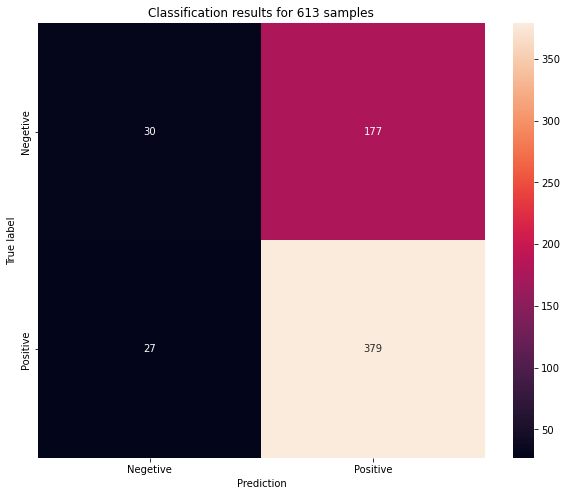

In [64]:
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=['Negetive','Positive'],
            yticklabels=['Negetive','Positive'],
            annot=True, fmt='g',
            cbar_kws={'label': r''})
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Classification results for 613 samples')
plt.show()   

In [65]:
len(y_pred_svm)

613

## k-fold cross-validation 
#### for SVM clf  and  $k = 5$

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define the number of folds (k)
k = 5

# Create a k-fold cross-validation object
kf = KFold(n_splits=k, shuffle=True)


# Perform k-fold cross-validation
scores = cross_val_score(svm_clf, X, y, cv=kf)

# Print the performance metrics for each fold
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

# Calculate and print the average performance metric across all folds
average_score = scores.mean()
sdt_score = np.std(scores,ddof=1)
print()
print(f"Average score: {average_score}")
print(f"Standard deviation of scores: {sdt_score}")

Fold 1: 0.6234718826405868
Fold 2: 0.6723716381418093
Fold 3: 0.6479217603911981
Fold 4: 0.6495098039215687
Fold 5: 0.7034313725490197

Average score: 0.6593412915288365
Standard deviation of scores: 0.03011396483024249


---

---

---

# data preparation

In this part, in addition to the `PSD` features that we obtained earlier, the features related to `PLV` are also used for classification.

### PLV calculation

calculating the Phase Locking Value (PLV) between each pair of channels in the EEG data :

In [67]:
import numpy as np
from scipy.signal import hilbert

In [68]:
eeg_data = _02wxw_EEG[0].T

In [98]:
def PLV_mat(eeg_data):
    def calculate_plv(channel1, channel2):
        analytic_signal1 = hilbert(channel1)
        analytic_signal2 = hilbert(channel2)
        phase_difference = np.angle(analytic_signal1 / analytic_signal2)
        plv = np.abs(np.mean(np.exp(1j * phase_difference)))
        return plv
    
    
    n_channels = eeg_data.shape[1]
    plv_matrix = np.zeros((n_channels, n_channels))

    for i in range(n_channels):
        for j in range(i+1, n_channels):
            plv = calculate_plv(eeg_data[:, i], eeg_data[:, j])
            plv_matrix[i, j] = plv
            plv_matrix[j, i] = plv
            
    return plv_matrix

In [101]:
plv_matrix0 = PLV_mat(eeg_data)
print(plv_matrix0)

[[0.         0.52287029 0.41979826 ... 0.52806228 0.48675964 0.51439402]
 [0.52287029 0.         0.34212731 ... 0.37520874 0.40905246 0.38413013]
 [0.41979826 0.34212731 0.         ... 0.34333628 0.33507136 0.37415188]
 ...
 [0.52806228 0.37520874 0.34333628 ... 0.         0.75696427 0.66836934]
 [0.48675964 0.40905246 0.33507136 ... 0.75696427 0.         0.42410071]
 [0.51439402 0.38413013 0.37415188 ... 0.66836934 0.42410071 0.        ]]


convert **plv_matrix** to DataFrame :

In [72]:
print(str(my_dataset.columns[3:62].values))   # channels

['Fpz' 'Fp1' 'Fp2' 'AF3' 'AF4' 'AF7' 'AF8' 'Fz' 'F1' 'F2' 'F3' 'F4' 'F5'
 'F6' 'F7' 'F8' 'FCz' 'FC1' 'FC2' 'FC3' 'FC4' 'FC5' 'FC6' 'FT7' 'FT8' 'Cz'
 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'T7' 'T8' 'CP1' 'CP2' 'CP3' 'CP4' 'CP5'
 'CP6' 'TP7' 'TP8' 'Pz' 'P3' 'P4' 'P5' 'P6' 'P7' 'P8' 'POz' 'PO3' 'PO4'
 'PO5' 'PO6' 'PO7' 'PO8' 'Oz' 'O1' 'O2']


In [102]:
plv_df = pd.DataFrame(plv_matrix0)
plv_df.columns=np.asarray(my_dataset.columns[3:62].values) 
plv_df.index = np.asarray(my_dataset.columns[3:62].values) 
plv_df.head()


,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,Fz,F1,F2,...,POz,PO3,PO4,PO5,PO6,PO7,PO8,Oz,O1,O2
Fpz,0.000000,0.522870,0.419798,0.541528,0.396060,0.283773,0.321804,0.183740,0.283086,0.097281,...,0.447732,0.294656,0.301047,0.088300,0.127981,0.329041,0.287887,0.528062,0.486760,0.514394
Fp1,0.522870,0.000000,0.342127,0.261564,0.125552,0.647871,0.310914,0.131568,0.121829,0.170898,...,0.289229,0.234043,0.162014,0.115117,0.112889,0.351229,0.316214,0.375209,0.409052,0.384130
Fp2,0.419798,0.342127,0.000000,0.245951,0.363737,0.219739,0.441027,0.070026,0.079308,0.177673,...,0.359494,0.237904,0.254345,0.109922,0.133217,0.256067,0.234497,0.343336,0.335071,0.374152
AF3,0.541528,0.261564,0.245951,0.000000,0.387262,0.206515,0.132769,0.391641,0.654838,0.086883,...,0.367430,0.285681,0.274246,0.149767,0.096414,0.278718,0.241462,0.388126,0.388229,0.380639
AF4,0.396060,0.125552,0.363737,0.387262,0.000000,0.056445,0.296182,0.332153,0.235668,0.543354,...,0.345329,0.230173,0.301364,0.084973,0.143410,0.185397,0.209764,0.332307,0.316911,0.345889


**MPLV**

In [103]:
mean_plv = plv_df.mean()
mean_plv[0:10].values

array([0.26443037, 0.24912406, 0.21204854, 0.22996983, 0.20914059,
       0.21542009, 0.19752243, 0.2175489 , 0.21500419, 0.22302091])

Convert a PLV (Phase Locking Value) matrix to an undirected binary graph using the Minimum Spanning Tree (**MST**) algorithm :

In [104]:
import networkx as nx

G = nx.Graph()

num_nodes = plv_matrix0.shape[0]

G.add_nodes_from(range(num_nodes))

threshold = 0.5

# Iterate over the upper triangular part of the PLV matrix
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        # Convert PLV value to binary (0 or 1)
        if plv_matrix[i, j] > threshold:  # Set your desired threshold here
            G.add_edge(i, j)

# Compute the Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(G)

print(len(G.edges()))

node_names_dict = {}
for index,ch in enumerate(np.asarray(my_dataset.columns[3:62].values) ):
    node_names_dict[index] = ch
        
G = nx.relabel_nodes(G,mapping=node_names_dict);


129


### Plot graph

In [77]:
def plot_graph(graph):
    # Plot the graph
    plt.figure(figsize=(10,10))
    nx.draw_shell(graph, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', linewidths=0.5)

    # Show the plot
    plt.axis('off')
    plt.show()


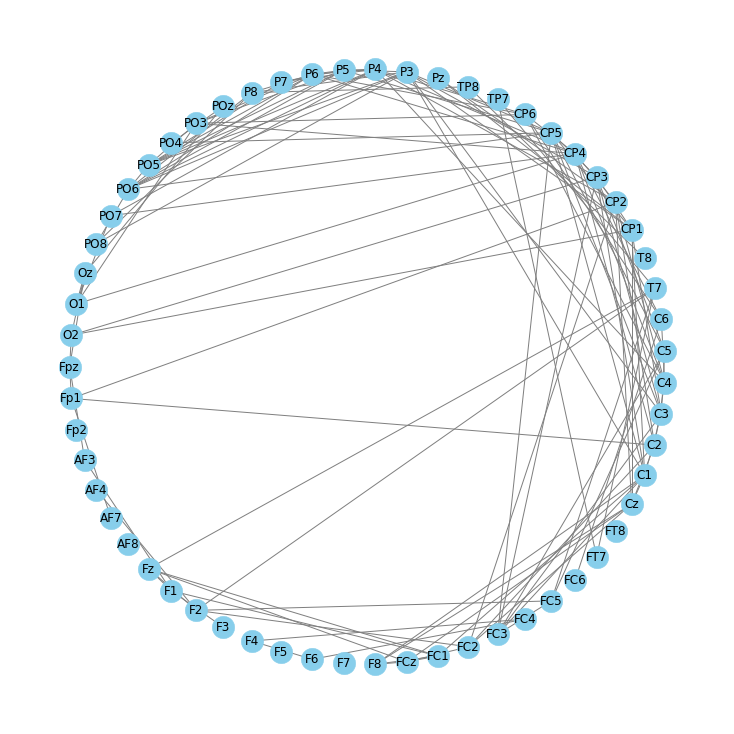

In [78]:
plot_graph(G)

Calculate betweenness centrality (**BC**):

In [138]:
betweenness = nx.betweenness_centrality(G)

# Print the betweenness centrality for each node
for index,(node, centrality) in enumerate(betweenness.items()):
    print(f"Node {node}: {centrality}")
    if index == 10: 
        break;
    

Node Fpz: 0.04331287433134343
Node Fp1: 0.04782729132841228
Node Fp2: 0.0
Node AF3: 0.017415275929207823
Node AF4: 0.0
Node AF7: 0.0
Node AF8: 0.0
Node Fz: 0.03282261827153469
Node F1: 0.04532067717185685
Node F2: 0.07352188812101272
Node F3: 0.0


In [80]:
len(betweenness)

59

Calculate nodal efficiency (**NE**) :


In [86]:
# Calculate the shortest path lengths between all pairs of nodes
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

# Calculate the nodal efficiency for each node
nodal_efficiency = {}
for node in G.nodes:
    efficiency = 0.0
    for source_node, paths in shortest_paths.items():
        for target_node, length in paths.items():
            if node != source_node and node != target_node and length != 0:
                efficiency += 1 / length
    nodal_efficiency[node] = efficiency / (len(G.nodes) - 1)

# Print the nodal efficiency for each node
for index,(node, efficiency) in enumerate(nodal_efficiency.items()):
    print(f"Node {node}: {efficiency}")
    if index == 10: 
        break;

Node Fpz: 16.40139573070631
Node Fp1: 16.389326765189065
Node Fp2: 17.045073891625865
Node AF3: 16.501067323481347
Node AF4: 16.57319376026295
Node AF7: 16.57463054187215
Node AF8: 17.045073891625865
Node Fz: 16.392775041051127
Node F1: 16.4418719211825
Node F2: 16.376354679803182
Node F3: 16.605870279146377


In [82]:
len(nodal_efficiency)

59

Calculate **PLV** feaures for all samples : 

In [91]:
def PLV_feature_extractor(plv_matrix):
    plv_df = pd.DataFrame(plv_matrix)
    plv_df.columns=np.asarray(my_dataset.columns[3:62].values) 
    plv_df.index = np.asarray(my_dataset.columns[3:62].values) 
    
    # MPLV calculation
    mean_plv = plv_df.mean()
    mean_plv[0:10].values
    ######################################
    
    # convert PLV_mat to graph
    G = nx.Graph()

    num_nodes = plv_matrix.shape[0]

    G.add_nodes_from(range(num_nodes))

    threshold = 0.5

    # Iterate over the upper triangular part of the PLV matrix
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            # Convert PLV value to binary (0 or 1)
            if plv_matrix[i, j] > threshold:  # Set your desired threshold here
                G.add_edge(i, j)

    # Compute the Minimum Spanning Tree (MST)
    mst = nx.minimum_spanning_tree(G)
    node_names_dict = {}
    for index,ch in enumerate(np.asarray(my_dataset.columns[3:62].values) ):
        node_names_dict[index] = ch
            
    G = nx.relabel_nodes(G,mapping=node_names_dict);
    betweenness = nx.betweenness_centrality(G)

    # Calculate the shortest path lengths between all pairs of nodes
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

    # Calculate the nodal efficiency for each node
    nodal_efficiency = {}
    for node in G.nodes:
        efficiency = 0.0
        for source_node, paths in shortest_paths.items():
            for target_node, length in paths.items():
                if node != source_node and node != target_node and length != 0:
                    efficiency += 1 / length
        nodal_efficiency[node] = efficiency / (len(G.nodes) - 1)

    return mean_plv, betweenness, nodal_efficiency

In [229]:
def update_df(prev_df,plv_matrix):
    mean_plv, betweenness, nodal_efficiency = PLV_feature_extractor(plv_matrix)

    new_row = np.hstack( (mean_plv.values,
        np.array(list(betweenness.values())),
        np.array(list(nodal_efficiency.values())))  )  
    
    prev_df.loc[len(prev_df)] = list(new_row)
        
    return prev_df

In [234]:
initial_df = pd.DataFrame(columns=list(range(59*3)))
colm = np.hstack((np.asarray(my_dataset.columns[3:62].values +'_MPLV'), 
np.asarray(my_dataset.columns[3:62].values +'_BC'),
np.asarray(my_dataset.columns[3:62].values +'_NE'))
)
initial_df.columns = colm

In [235]:
initial_df.head()

,Fpz_MPLV,Fp1_MPLV,Fp2_MPLV,AF3_MPLV,AF4_MPLV,AF7_MPLV,AF8_MPLV,Fz_MPLV,F1_MPLV,F2_MPLV,...,POz_NE,PO3_NE,PO4_NE,PO5_NE,PO6_NE,PO7_NE,PO8_NE,Oz_NE,O1_NE,O2_NE


In [ ]:

for sbj in subject_IDs:
    path = f'./EEG/{sbj}_epoched.set' 
    epochs=mne.io.read_epochs_eeglab(path).set_eeg_reference('average').apply_baseline(baseline=(-0.5,0));
    EEG_data = epochs.crop(0,3.999).get_data()
    
    psds = mne.Epochs.compute_psd(epochs, fmin=0, fmax=100)
    
    for epoch_index in range(len(epochs)):
        eeg_data = EEG_data[epoch_index].T
        
        initial_df = update_df(initial_df,PLV_mat(eeg_data))
        

In [237]:
initial_df.tail()

,Fpz_MPLV,Fp1_MPLV,Fp2_MPLV,AF3_MPLV,AF4_MPLV,AF7_MPLV,AF8_MPLV,Fz_MPLV,F1_MPLV,F2_MPLV,...,POz_NE,PO3_NE,PO4_NE,PO5_NE,PO6_NE,PO7_NE,PO8_NE,Oz_NE,O1_NE,O2_NE
2038,0.183271,0.168336,0.174880,0.061459,0.068833,0.123050,0.172370,0.223638,0.218205,0.184854,...,13.594910,13.418842,13.469089,13.201026,13.240107,13.236658,13.297578,13.471141,13.330911,13.437479
2039,0.183836,0.141285,0.165405,0.059689,0.141637,0.154105,0.208727,0.268583,0.266298,0.194593,...,11.679844,11.176396,11.176970,11.098235,11.237315,11.150534,11.118924,11.362479,11.340640,11.266872
2040,0.169015,0.174073,0.147406,0.056249,0.058447,0.150723,0.163273,0.224681,0.220734,0.181851,...,11.895279,11.462685,11.459811,11.249302,11.237808,11.373604,11.232635,11.490517,11.486946,11.415969
2041,0.180736,0.166645,0.134617,0.066971,0.077807,0.131322,0.119612,0.216020,0.211812,0.166135,...,14.519951,14.011330,13.842939,13.707882,13.699261,13.759031,13.782594,14.029146,13.907307,13.961330
2042,0.185487,0.182023,0.165049,0.066816,0.070714,0.151041,0.135385,0.226781,0.232956,0.178488,...,13.402709,12.884319,12.822250,12.713054,12.671100,12.680296,12.705583,12.930296,12.833169,12.878571


In [238]:
# Save PLV_features DataFrame to csv file
initial_df.to_csv('PLV_feature_dataframe.csv', index=False) 

---

## Classification using `PSD_feature1` :


### Load data :

In [63]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



df = pd.read_csv('PSD_feature1_dataframe.csv')

# Print the loaded dataframe
df.head()

,valence,subject,epoch,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,...,POz_gamma,PO3_gamma,PO4_gamma,PO5_gamma,PO6_gamma,PO7_gamma,PO8_gamma,Oz_gamma,O1_gamma,O2_gamma
0,1,02wxw,0.0,1.882452e-10,2.613977e-10,2.342725e-10,1.270833e-10,1.450096e-10,2.741674e-10,3.041831e-10,...,2.544078e-11,2.454294e-11,3.318986e-11,2.982913e-11,3.486715e-11,1.226165e-10,7.876805e-11,1.921007e-10,1.707312e-10,9.583163e-11
1,0,02wxw,1.0,1.671469e-10,3.139351e-10,3.677248e-10,1.339098e-10,1.509435e-10,3.566882e-10,5.303595e-10,...,2.545782e-11,2.928772e-11,4.057309e-11,4.320864e-11,5.297054e-11,4.226461e-10,2.187757e-10,2.630759e-10,2.526730e-10,1.165207e-10
2,0,02wxw,2.0,1.414707e-10,3.369094e-10,3.104535e-10,1.169302e-10,1.518435e-10,3.604066e-10,3.707362e-10,...,2.371955e-11,2.611802e-11,3.244112e-11,3.054964e-11,3.988925e-11,1.364150e-10,1.112271e-10,2.204613e-10,1.989883e-10,9.160977e-11
3,0,02wxw,3.0,1.852999e-10,2.077472e-10,1.877499e-10,1.441438e-10,1.366574e-10,1.806031e-10,2.957313e-10,...,2.582457e-11,2.735440e-11,3.400165e-11,3.346374e-11,3.468071e-11,9.096899e-11,8.346808e-11,2.297976e-10,2.168716e-10,9.878631e-11
4,0,02wxw,4.0,1.445515e-10,2.221605e-10,2.868321e-10,1.106543e-10,1.364104e-10,2.084835e-10,4.279767e-10,...,2.333754e-11,2.631364e-11,3.576147e-11,3.297819e-11,3.843963e-11,1.785779e-10,1.415442e-10,2.670894e-10,2.486009e-10,1.133204e-10


In [75]:
print("number of samples with (valence = 1) : ",len(df[df['valence'] == 1]))
print("number of samples with (valence = 0) : ",len(df[df['valence'] == 0]))

number of samples with (valence = 1) :  1347
number of samples with (valence = 0) :  696


There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

- Random `Oversampling`: Randomly duplicate examples in the minority class.
- Random `Undersampling`: Randomly delete examples in the majority class

To avoid `data leakage`, we first divide the data into test and training data and then perform normalization.

In [72]:
from sklearn.model_selection import train_test_split


X = df.drop(['valence','subject','epoch'], axis=1)
y = df['valence']

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,shuffle=True)
y_test[0:10].values 


241     0
1797    1
2000    1
1937    1
1006    0
Name: valence, dtype: int64

In [77]:
print("number of train samples with (valence = 1) : ",len(y_train[y_train == 1]))
print("number of train samples with (valence = 0) : ",len(y_train[y_train == 0]))

number of train samples with (valence = 1) :  956
number of train samples with (valence = 0) :  474


 **balance** the dataframe using oversampling :

In [80]:
from imblearn.under_sampling import RandomUnderSampler


# Apply undersampling to balance the dataframe
undersampler = RandomUnderSampler()
X_train, y_train = undersampler.fit_resample(X_train, y_train)



In [82]:
print("number of train samples with (valence = 1) : ",len(y_train[y_train == 1]))
print("number of train samples with (valence = 0) : ",len(y_train[y_train == 0]))

number of train samples with (valence = 1) :  474
number of train samples with (valence = 0) :  474


### Data Normalization

The `StandardScaler` from the `sklearn.preprocessing` module in scikit-learn is a class used for standardizing features by removing the mean and scaling to unit variance. 

In [83]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the train data
scaler.fit(X_train)

# Transform the train and test data using the scaler
train_normalized = scaler.transform(X_train)
test_normalized = scaler.transform(X_test)

# Convert the normalized arrays back to dataframes
train_normalized_df = pd.DataFrame(train_normalized, columns=X_train.columns) + 2
test_normalized_df = pd.DataFrame(test_normalized, columns=X_test.columns) + 2


In [84]:
train_normalized_df.head()

,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,Fz,F1,F2,...,POz_gamma,PO3_gamma,PO4_gamma,PO5_gamma,PO6_gamma,PO7_gamma,PO8_gamma,Oz_gamma,O1_gamma,O2_gamma
0,1.368383,1.273862,1.411790,1.279639,1.296151,1.551493,1.376883,1.671852,1.429546,1.520870,...,1.450846,1.761706,2.219394,1.933919,1.800110,2.891398,1.933032,1.479697,1.891634,1.635631
1,1.547148,1.295774,1.819979,1.396057,1.629707,1.703710,1.501062,1.921839,1.936131,1.795844,...,3.058974,2.329074,3.103603,2.379138,4.428541,2.169746,3.388103,3.749896,5.708547,3.378638
2,1.644384,1.381495,1.862789,1.628401,1.450089,1.487087,1.769977,1.788258,1.567403,1.658393,...,1.435127,1.468696,1.386323,1.521527,1.649827,1.707165,1.475865,1.288441,1.530659,1.429388
3,1.579655,1.180516,1.444425,1.268637,1.373104,1.477956,1.437095,1.758333,1.502488,1.597887,...,1.753838,2.024780,1.990322,2.053546,1.967956,1.780024,3.008321,1.668362,2.130918,3.089181
4,2.389976,3.362265,2.845527,2.083256,4.482369,2.290200,2.308444,1.929816,1.722743,2.042484,...,1.640918,1.600404,1.550235,1.554160,1.661601,1.763888,1.597499,1.946655,1.886751,1.754744


In [85]:
test_normalized_df.head()

,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,Fz,F1,F2,...,POz_gamma,PO3_gamma,PO4_gamma,PO5_gamma,PO6_gamma,PO7_gamma,PO8_gamma,Oz_gamma,O1_gamma,O2_gamma
0,1.985502,3.024508,2.277321,1.950487,1.477991,4.198356,2.430816,1.801657,2.055197,1.550676,...,1.544540,1.637549,1.734532,2.045869,1.806682,2.612979,2.671131,2.107362,1.928540,2.198460
1,1.778800,1.908660,2.218895,2.519457,2.281709,2.271591,2.718791,1.851416,1.648347,1.798878,...,2.717112,1.521823,1.720657,1.492126,1.732571,1.675210,1.376054,1.370020,1.585448,1.310815
2,1.341317,1.515455,1.394945,1.550870,1.296591,1.452483,1.375263,1.665314,1.448375,1.501449,...,1.993005,2.391979,2.100020,1.728107,1.839206,1.901372,1.795423,2.296818,2.099330,1.714898
3,1.373264,1.169226,1.393230,1.295037,1.411593,1.464073,1.445765,1.775670,1.423718,1.508064,...,1.755607,1.639970,1.587580,1.728473,1.694532,1.979345,1.766729,2.616588,1.837009,2.418587
4,1.510762,1.363556,1.628579,1.391842,1.563096,1.559652,1.971115,1.893231,1.702036,1.772037,...,1.913702,1.600519,1.865105,1.486533,1.712538,1.532446,1.502172,2.165202,1.793377,1.379014


### feature selection


We perform feature selection using `Fisher` and `Random Forest` methods and compare the results at the end.

using Fisher method:

In [86]:
# Perform Fisher feature selection
k = 35  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(train_normalized_df, y_train)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features_fisher = X.columns[selected_indices]

# Print the selected feature names
print("Selected features:")
for feature in selected_features_fisher:
    print(feature,end="  ,  ")

Selected features:
Fpz  ,  Fp1  ,  F5  ,  Fp1_theta  ,  AF7_theta  ,  FC6_theta  ,  Pz_theta  ,  P5_theta  ,  POz_theta  ,  PO3_theta  ,  PO4_theta  ,  PO5_theta  ,  PO7_theta  ,  Oz_theta  ,  O2_theta  ,  AF7_alpha  ,  Fpz_beta  ,  Fp1_beta  ,  AF7_beta  ,  Fz_beta  ,  F3_beta  ,  F5_beta  ,  F8_beta  ,  Fpz_gamma  ,  Fp1_gamma  ,  AF7_gamma  ,  Fz_gamma  ,  F1_gamma  ,  F3_gamma  ,  F5_gamma  ,  FCz_gamma  ,  FC1_gamma  ,  C6_gamma  ,  CP6_gamma  ,  Pz_gamma  ,  

using Random Forest method:

**Random Forest** is a powerful machine learning algorithm that can be used for both classification and regression tasks. It combines multiple decision trees to improve the accuracy of predictions and handle noisy or missing data. One of the key advantages of Random Forest is that it can determine the importance of different features in a dataset.

The feature importance in Random Forest can be determined using a metric called **Gini importance**. It measures the total reduction of the Gini impurity of the dataset when a particular feature is used for splitting. The higher the Gini importance, the more important the feature is for the model.

In [87]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_normalized_df, y_train)

importance = clf.feature_importances_

In [88]:

importance_zip = list(zip(importance,train_normalized_df.columns))
importance_dict = dict(importance_zip)

importance_dict = dict(sorted(importance_dict.items(),reverse=True))

importance_dict

{0.014875548489521072: 'POz_theta',
 0.012107102122313307: 'PO4_theta',
 0.009672023454344857: 'POz_alpha',
 0.007743175977690617: 'POz',
 0.00655751469780721: 'Oz_theta',
 0.006430405509491906: 'Pz_alpha',
 0.005887986001217722: 'PO5_theta',
 0.005748938426363426: 'C6_gamma',
 0.00537231913320803: 'O2_theta',
 0.00520158392648485: 'FC3_delta',
 0.005031416722568683: 'Fpz_gamma',
 0.004826257589267131: 'Pz_gamma',
 0.004642453214898068: 'AF7_gamma',
 0.0044884003966086175: 'C2_theta',
 0.004436744488759192: 'PO7_theta',
 0.0044288529992328: 'TP8_theta',
 0.00437357361671874: 'C1_theta',
 0.004320954578478099: 'AF8_gamma',
 0.004288015565394085: 'FC3_gamma',
 0.004236392331037887: 'C6_delta',
 0.00418255456517496: 'TP8_delta',
 0.004095294377298416: 'T7_beta',
 0.00409339213731716: 'C1',
 0.0040588852725028015: 'FCz_theta',
 0.004046840042495724: 'Fp2_delta',
 0.004043366513411525: 'Fp2_beta',
 0.004031674166342352: 'CP4_gamma',
 0.004019325981498609: 'AF7_delta',
 0.004018694669311355:

In [89]:
# Get the first k items in the dictionary
first_k_items = list(importance_dict.items())[:k]

first_k_items
first_k_importance = [i for i,_ in first_k_items]
selected_features_RF = [i for _ ,i in first_k_items]

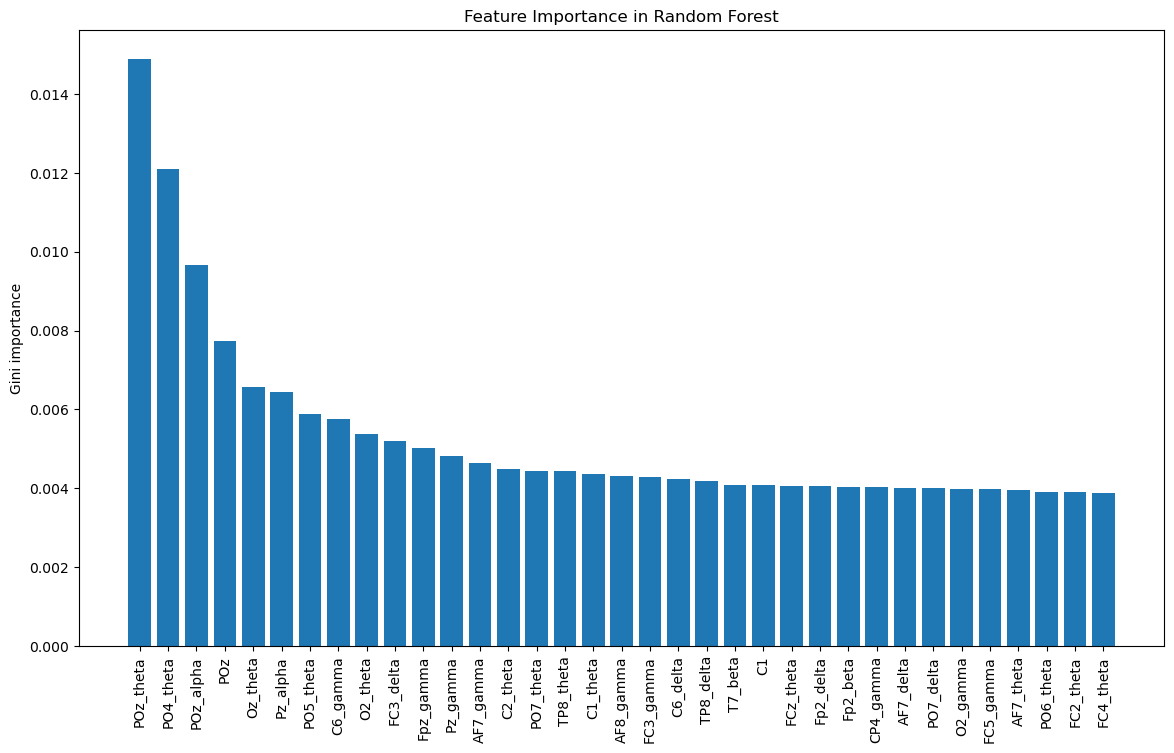

In [90]:
plt.figure(figsize=(14, 8))
plt.bar(range(k), first_k_importance)
plt.xticks(range(k), selected_features_RF, rotation=90)
plt.title("Feature Importance in Random Forest")
plt.ylabel('Gini importance')
plt.show()

In [91]:
train_normalized_df_fihser = train_normalized_df[selected_features_fisher]
test_normalized_df_fihser = test_normalized_df[selected_features_fisher]

train_normalized_df_RF = train_normalized_df[selected_features_RF]
test_normalized_df_RF = test_normalized_df[selected_features_RF]

## Classification

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn import svm

import keras 
# from keras.models import Sequential
# from keras.layers import Dense, Activation ,Dropout, Input

# import tensorflow as tf

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

- MLP

In [17]:
model = Sequential()
model.add(Dense(64, activation='tanh',use_bias=True, input_shape=(train_normalized_df_RF.shape[1],) ))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh', use_bias=True))
model.add(Dropout(0.5))
model.add(Dense(16, activation='tanh', use_bias=True))
model.add(Dense(1, activation='sigmoid', use_bias=True))

model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_normalized_df_RF, y_train, 
          validation_data=(test_normalized_df_RF, y_test),
          batch_size=8,
          epochs=70,
          verbose=1)


Epoch 1/70
236/236 [==============================] - 4s 14ms/step - loss: 0.7212 - accuracy: 0.5279 - val_loss: 0.6839 - val_accuracy: 0.5575
Epoch 2/70
236/236 [==============================] - 3s 12ms/step - loss: 0.6965 - accuracy: 0.5501 - val_loss: 0.6812 - val_accuracy: 0.5414
Epoch 3/70
236/236 [==============================] - 3s 11ms/step - loss: 0.6915 - accuracy: 0.5533 - val_loss: 0.6789 - val_accuracy: 0.5624
Epoch 4/70
236/236 [==============================] - 3s 14ms/step - loss: 0.6816 - accuracy: 0.5698 - val_loss: 0.6824 - val_accuracy: 0.5340
Epoch 5/70
236/236 [==============================] - 3s 13ms/step - loss: 0.6754 - accuracy: 0.5719 - val_loss: 0.6919 - val_accuracy: 0.5389
Epoch 6/70
236/236 [==============================] - 3s 13ms/step - loss: 0.6672 - accuracy: 0.6005 - val_loss: 0.6673 - val_accuracy: 0.5550
Epoch 7/70
236/236 [==============================] - 4s 16ms/step - loss: 0.6708 - accuracy: 0.5984 - val_loss: 0.6626 - val_accuracy: 0.5946

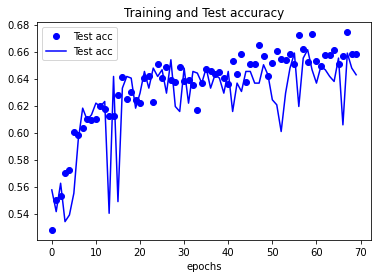

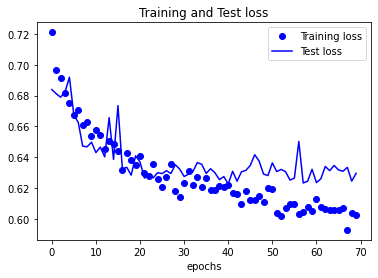

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Test acc')
plt.plot(epochs, val_acc, 'b', label='Test acc')
plt.title('Training and Test accuracy')
plt.xlabel('epochs')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('epochs')
plt.legend()

plt.show()

Overfitted !!

## k-fold cross-validation and Confusion matrix

In [102]:
def plot_confusion_mat(y_test,y_pred):
    confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx,
                xticklabels=['Negetive','Positive'],
                yticklabels=['Negetive','Positive'],
                annot=True, fmt='g',
                cbar_kws={'label': r''})
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title(f'Classification results for {len(y_test)} samples')
    plt.show()   

In [103]:

def k_fold_validation(df,k_fold,clf , is_fisher=True):
    acc = []
    for _ in range(k_fold):
        X = df.drop(['valence','subject','epoch'], axis=1)
        y = df['valence']
        X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,shuffle=True)
        
        # Apply undersampling to balance the dataframe
        undersampler = RandomUnderSampler()
        X_train, y_train = undersampler.fit_resample(X_train, y_train)
        scaler = StandardScaler()
        # Fit the scaler on the train data
        scaler.fit(X_train)
        # Transform the train and test data using the scaler
        train_normalized = scaler.transform(X_train)
        test_normalized = scaler.transform(X_test)
        # Convert the normalized arrays back to dataframes
        train_normalized_df = pd.DataFrame(train_normalized, columns=X_train.columns) + 5
        test_normalized_df = pd.DataFrame(test_normalized, columns=X_train.columns) + 5
        
                
        # Perform Fisher feature selection
        k = 35  # Number of top features to select
        selector = SelectKBest(score_func=chi2, k=k)
        X_new = selector.fit_transform(train_normalized_df, y_train)

        # Get the selected feature indices
        selected_indices = selector.get_support(indices=True)

        # Get the selected feature names
        selected_features_fisher = X.columns[selected_indices]
        
        
        
        clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
        clf2.fit(train_normalized_df, y_train)
        importance = clf2.feature_importances_    
        importance_zip = list(zip(importance,train_normalized_df.columns))
        importance_dict = dict(importance_zip)
        importance_dict = dict(sorted(importance_dict.items(),reverse=True))

        first_k_items = list(importance_dict.items())[:k]
        first_k_importance = [i for i,_ in first_k_items]
        selected_features_RF = [i for _ ,i in first_k_items]
        
        if is_fisher :
            train_normalized_df = train_normalized_df[selected_features_fisher]
            test_normalized_df = test_normalized_df[selected_features_fisher]
        else :
            train_normalized_df = train_normalized_df[selected_features_RF]
            test_normalized_df = test_normalized_df[selected_features_RF]
        
        clf.fit(train_normalized_df,y_train)

        acc1 = accuracy_score(
            clf.predict(test_normalized_df),
            y_test
        ) 
        acc.append(acc1)
        
    print('accuracies :',acc)
    return np.mean(acc),np.std(acc,ddof=1), y_test, clf.predict(test_normalized_df)

-  Gaussian naive bayes 

with fisher feature selection :

In [104]:
k = 5
clf = GaussianNB()
mean_GNB1,std_GNB1, y_test, y_pred = k_fold_validation(df,k,clf,True)

print()
print(f"Average score: {mean_GNB1}")
print(f"Standard deviation of scores: {std_GNB1}")

plot_confusion_mat(y_test,y_pred)

accuracies : [0.43882544861337686, 0.5579119086460033, 0.4257748776508972, 0.4763458401305057, 0.5008156606851549]

Average score: 0.4799347471451876
Standard deviation of scores: 0.05280292702342365


NameError: name 'tf' is not defined

with Random Forest feature selection :

In [105]:
clf = GaussianNB()
mean_GNB2,std_GNB2, y_test, y_pred = k_fold_validation(df,k,clf,False)

print()
print(f"Average score: {mean_GNB2}")
print(f"Standard deviation of scores: {std_GNB2}")

plot_confusion_mat(y_test,y_pred)

accuracies : [0.49755301794453505, 0.4600326264274062, 0.5154975530179445, 0.6508972267536705, 0.5579119086460033]

Average score: 0.5363784665579119
Standard deviation of scores: 0.07305879632265565


NameError: name 'tf' is not defined

- LogisticRegression

with fisher feature selection :

In [ ]:
clf = LogisticRegression()
mean_LR1,std_LR1 , y_test, y_pred = k_fold_validation(df,k,clf,True)
print()
print(f"Average score: {mean_LR1}")
print(f"Standard deviation of scores: {std_LR1}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

accuracies : [0.6131025957972805, 0.6291718170580964, 0.65389369592089, 0.6662546353522868, 0.6254635352286774]

Average score: 0.6375772558714462
Standard deviation of scores: 0.02182327269784025


/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


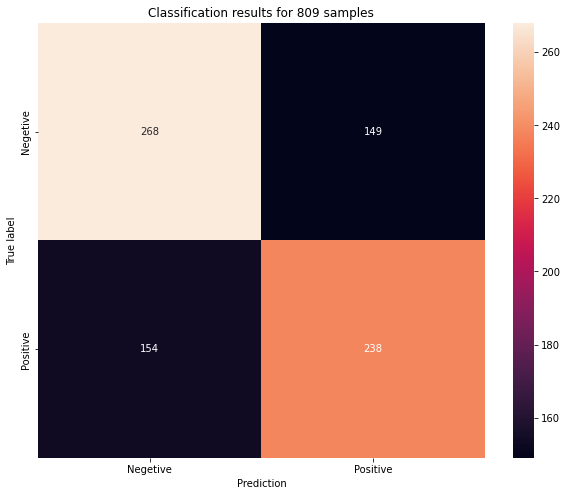

In [101]:
clf = LogisticRegression()
mean_LR2,std_LR2, y_test, y_pred = k_fold_validation(df,k,clf,False)
print()
print(f"Average score: {mean_LR2}")
print(f"Standard deviation of scores: {std_LR2}")

plot_confusion_mat(y_test,y_pred)

- SVM

with Fisher feature selection :

accuracies : [0.6032138442521632, 0.6254635352286774, 0.5908529048207664, 0.6069221260815822, 0.6415327564894932]

Average score: 0.6135970333745364
Standard deviation of scores: 0.01994291152014156


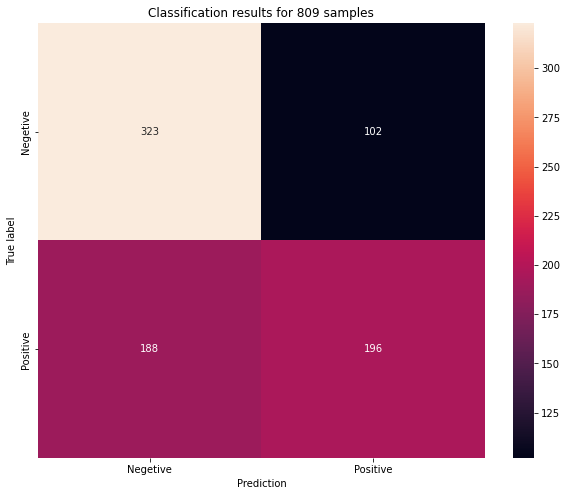

In [102]:
svm_clf = svm.SVC(kernel='linear')
mean_svm1,std_svm1 , y_test, y_pred= k_fold_validation(df,k,svm_clf,True)
print()
print(f"Average score: {mean_svm1}")
print(f"Standard deviation of scores: {std_svm1}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

accuracies : [0.6427688504326329, 0.6514215080346106, 0.6291718170580964, 0.6328800988875154, 0.6341161928306551]

Average score: 0.6380716934487021
Standard deviation of scores: 0.008973395012549587


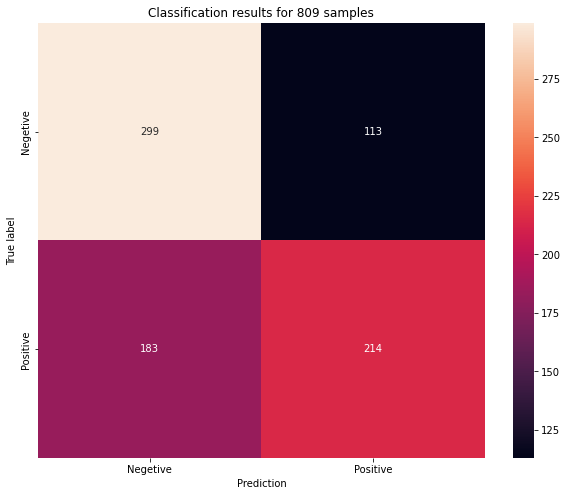

In [103]:
svm_clf = svm.SVC(kernel='linear')
mean_svm2,std_svm2, y_test, y_pred = k_fold_validation(df,k,svm_clf,False)
print()
print(f"Average score: {mean_svm2}")
print(f"Standard deviation of scores: {std_svm2}")

plot_confusion_mat(y_test,y_pred)

- Random Forest

with Fisher feature selection :

accuracies : [0.823238566131026, 0.8417799752781211, 0.8145859085290482, 0.7948084054388134, 0.8454882571075402]

Average score: 0.8239802224969097
Standard deviation of scores: 0.02073176820393749


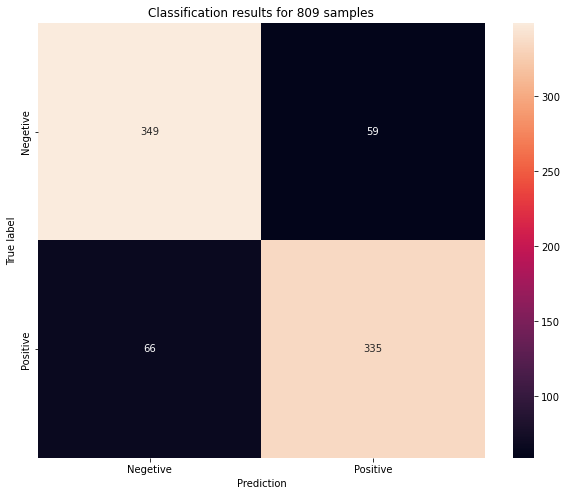

In [104]:
k = 5
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
mean_RF1,std_RF1, y_test, y_pred = k_fold_validation(df,k,clf2,True)

print()
print(f"Average score: {mean_RF1}")
print(f"Standard deviation of scores: {std_RF1}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

accuracies : [0.8541409147095179, 0.8491965389369592, 0.8170580964153276, 0.8504326328800988, 0.8343634116192831]

Average score: 0.8410383189122375
Standard deviation of scores: 0.01537931373547173


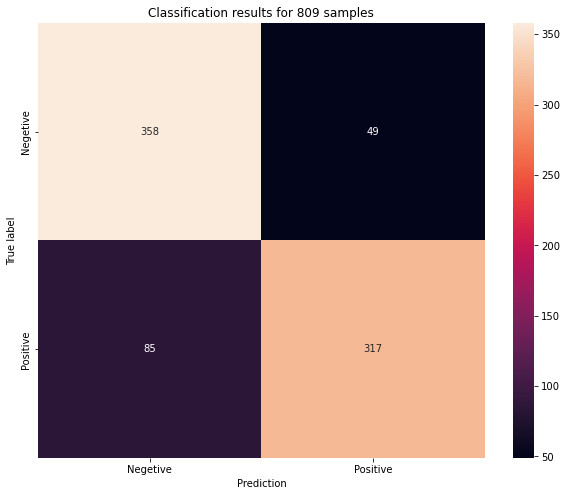

In [105]:
k = 5
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
mean_RF2,std_RF2, y_test, y_pred = k_fold_validation(df,k,clf2,False)

print()
print(f"Average score: {mean_RF2}")
print(f"Standard deviation of scores: {std_RF2}")

plot_confusion_mat(y_test,y_pred)

---

## Classification using `PSD2_feature` :

In [106]:
df1 = pd.read_csv('PSD_feature2_dataframe.csv')
# Print the loaded dataframe
df1.head()

,valence,subject,epoch,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,...,POz_gamma,PO3_gamma,PO4_gamma,PO5_gamma,PO6_gamma,PO7_gamma,PO8_gamma,Oz_gamma,O1_gamma,O2_gamma
0,1,02wxw,0.0,2.456337e-10,3.266768e-10,3.295370e-10,1.944435e-10,2.154704e-10,3.850442e-10,3.878837e-10,...,0.056963,0.076125,0.088749,0.102018,0.078527,0.159390,0.093976,0.174772,0.157332,0.162810
1,0,02wxw,1.0,2.458365e-10,5.067476e-10,5.353065e-10,2.027159e-10,2.303538e-10,5.809374e-10,8.065336e-10,...,0.082700,0.094217,0.126480,0.109665,0.196079,0.317134,0.262376,0.282534,0.304835,0.209694
2,0,02wxw,2.0,1.885912e-10,5.082114e-10,4.451032e-10,1.812602e-10,2.194258e-10,5.590092e-10,5.104888e-10,...,0.084917,0.083370,0.091735,0.076765,0.100153,0.153004,0.158329,0.264213,0.237969,0.177830
3,0,02wxw,3.0,2.581694e-10,3.036783e-10,2.391122e-10,2.207255e-10,1.864580e-10,2.780606e-10,3.299276e-10,...,0.071845,0.089008,0.080930,0.083762,0.072435,0.094034,0.057617,0.204932,0.225898,0.121774
4,0,02wxw,4.0,1.855137e-10,3.091304e-10,4.184620e-10,1.592830e-10,1.991914e-10,3.346202e-10,6.463379e-10,...,0.091636,0.057336,0.110347,0.067285,0.075926,0.140565,0.115254,0.320700,0.280254,0.196049


In [107]:
X = df1.drop("valence", axis=1)
y = df1["valence"]



-  Gaussian naive bayes 

with fisher feature selection :

accuracies : [0.5859085290482077, 0.5673671199011124, 0.5599505562422744, 0.580964153275649, 0.5797280593325093]

Average score: 0.5747836835599506
Standard deviation of scores: 0.010740511246590105


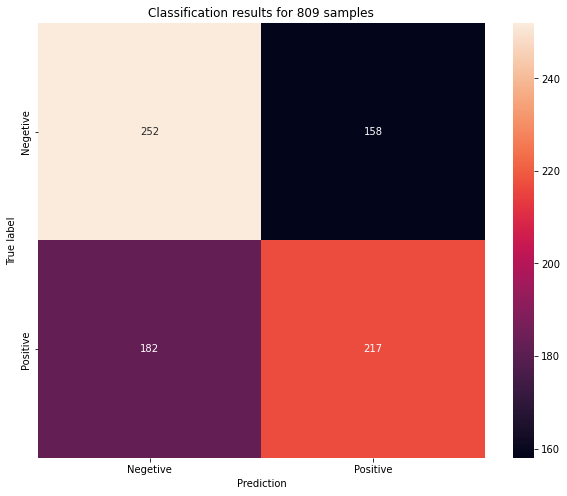

In [108]:
k = 5
clf = GaussianNB()
mean_GNB1_1,std_GNB1_1, y_test, y_pred = k_fold_validation(df1,k,clf,True)

print()
print(f"Average score: {mean_GNB1_1}")
print(f"Standard deviation of scores: {std_GNB1_1}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

accuracies : [0.6415327564894932, 0.619283065512979, 0.5636588380716935, 0.5896168108776267, 0.6205191594561187]

Average score: 0.6069221260815822
Standard deviation of scores: 0.030441558358528402


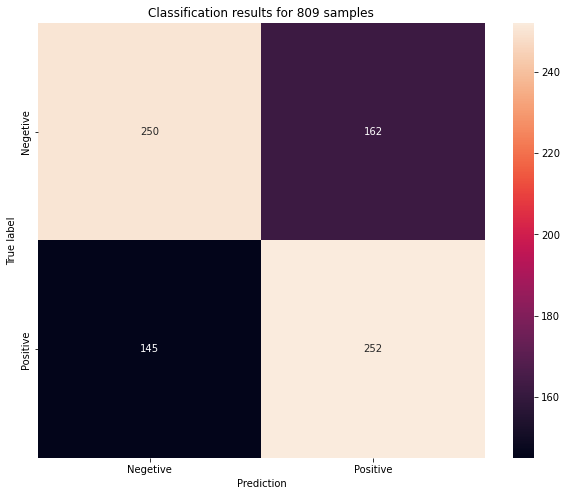

In [109]:
clf = GaussianNB()
mean_GNB2_1,std_GNB2_1, y_test, y_pred = k_fold_validation(df1,k,clf,False)

print()
print(f"Average score: {mean_GNB2_1}")
print(f"Standard deviation of scores: {std_GNB2_1}")

plot_confusion_mat(y_test,y_pred)

- LogisticRegression

with fisher feature selection :

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

accuracies : [0.6415327564894932, 0.6217552533992583, 0.6242274412855378, 0.6291718170580964, 0.6402966625463535]

Average score: 0.6313967861557479
Standard deviation of scores: 0.009100203866158684


/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


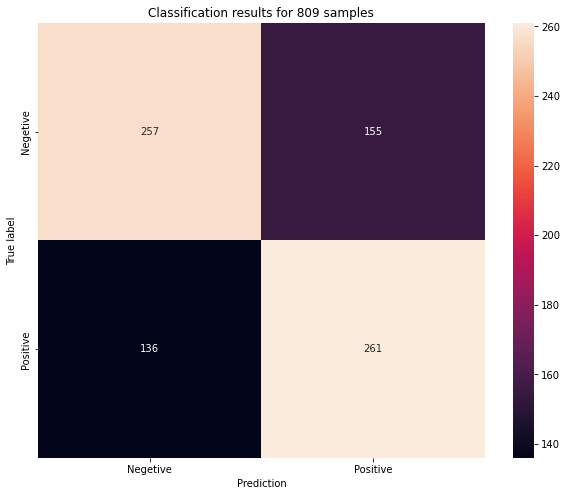

In [110]:
clf = LogisticRegression()
mean_LR1_1,std_LR1_1 , y_test, y_pred = k_fold_validation(df1,k,clf,True)
print()
print(f"Average score: {mean_LR1_1}")
print(f"Standard deviation of scores: {std_LR1_1}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

accuracies : [0.6625463535228677, 0.6440049443757726, 0.6514215080346106, 0.6477132262051916, 0.6662546353522868]

Average score: 0.6543881334981458
Standard deviation of scores: 0.009598649522035685


/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


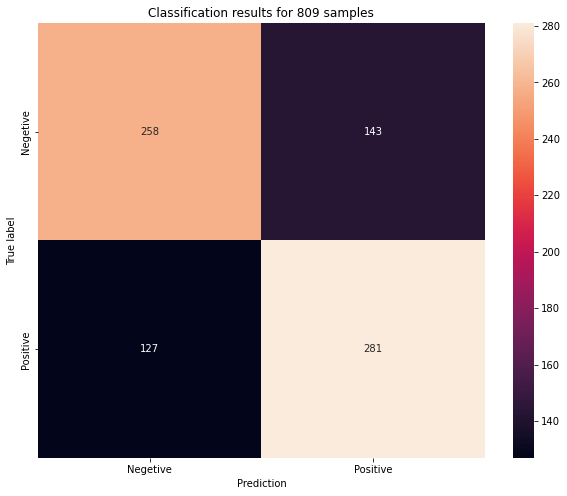

In [111]:
clf = LogisticRegression()
mean_LR2_1,std_LR2_1, y_test, y_pred = k_fold_validation(df1,k,clf,False)
print()
print(f"Average score: {mean_LR2_1}")
print(f"Standard deviation of scores: {std_LR2_1}")

plot_confusion_mat(y_test,y_pred)

- SVM

with Fisher feature selection :

accuracies : [0.6266996291718171, 0.6143386897404203, 0.6699629171817059, 0.657601977750309, 0.6402966625463535]

Average score: 0.6417799752781211
Standard deviation of scores: 0.022512525313025892


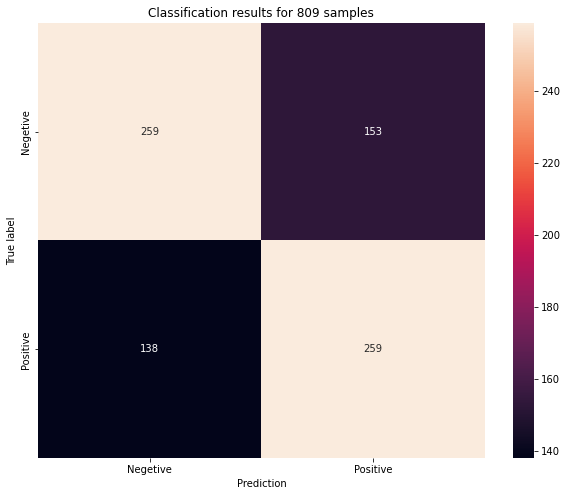

In [112]:
svm_clf = svm.SVC(kernel='linear')
mean_svm1_1,std_svm1_1 , y_test, y_pred= k_fold_validation(df1,k,svm_clf,True)
print()
print(f"Average score: {mean_svm1_1}")
print(f"Standard deviation of scores: {std_svm1_1}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

accuracies : [0.6563658838071693, 0.6415327564894932, 0.6600741656365884, 0.6687268232385661, 0.6415327564894932]

Average score: 0.653646477132262
Standard deviation of scores: 0.011933269108674607


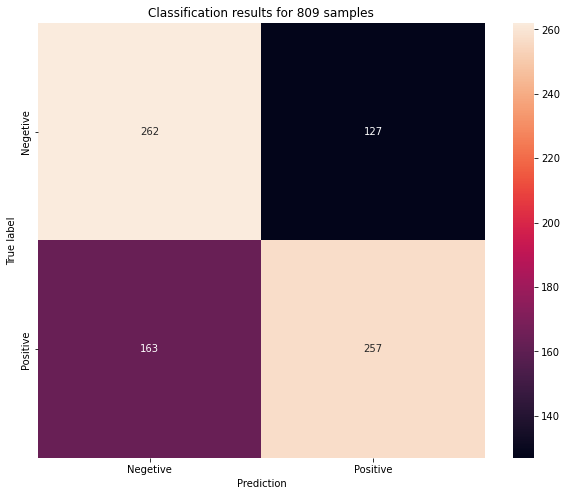

In [113]:
svm_clf = svm.SVC(kernel='linear')
mean_svm2_1,std_svm2_1, y_test, y_pred = k_fold_validation(df1,k,svm_clf,False)
print()
print(f"Average score: {mean_svm2_1}")
print(f"Standard deviation of scores: {std_svm2_1}")

plot_confusion_mat(y_test,y_pred)

- Random Forest

with Fisher feature selection :

accuracies : [0.7861557478368356, 0.8121137206427689, 0.8096415327564895, 0.826946847960445, 0.8257107540173053]

Average score: 0.8121137206427689
Standard deviation of scores: 0.016468371563008937


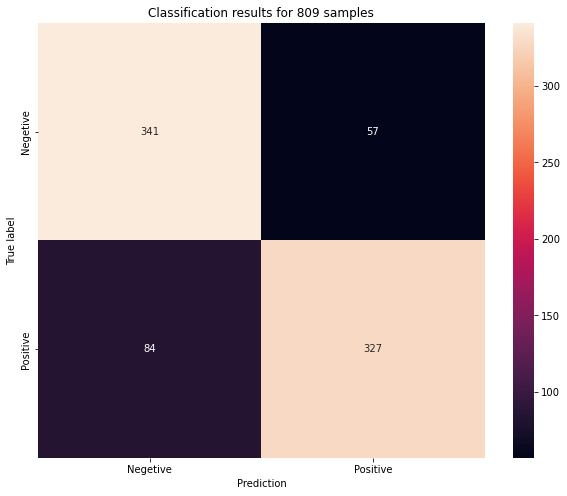

In [114]:
k = 5
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
mean_RF1_1,std_RF1_1, y_test, y_pred = k_fold_validation(df1,k,clf2,True)

print()
print(f"Average score: {mean_RF1_1}")
print(f"Standard deviation of scores: {std_RF1_1}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

accuracies : [0.8343634116192831, 0.8244746600741656, 0.8318912237330037, 0.8133498145859085, 0.8430160692212608]

Average score: 0.8294190358467244
Standard deviation of scores: 0.011159128606469606


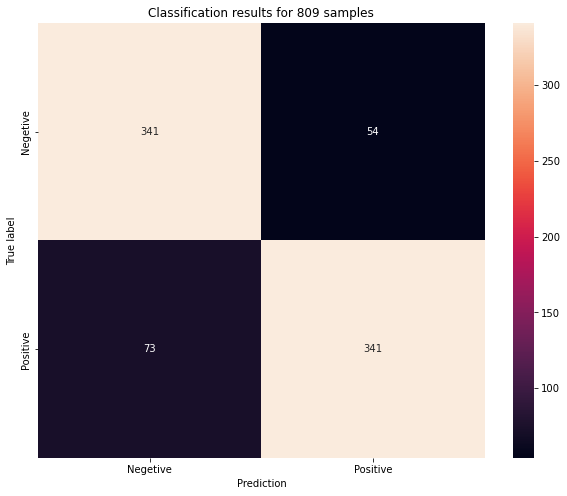

In [115]:
k = 5
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
mean_RF2_1,std_RF2_1, y_test, y_pred = k_fold_validation(df1,k,clf2,False)

print()
print(f"Average score: {mean_RF2_1}")
print(f"Standard deviation of scores: {std_RF2_1}")

plot_confusion_mat(y_test,y_pred)

----

## Classification using `PLV_feature` :

In [109]:

df2 = pd.read_csv('PLV_feature_dataframe.csv')
# Print the loaded dataframe

df2.head()

,Fpz_MPLV,Fp1_MPLV,Fp2_MPLV,AF3_MPLV,AF4_MPLV,AF7_MPLV,AF8_MPLV,Fz_MPLV,F1_MPLV,F2_MPLV,...,PO5_NE,PO6_NE,PO7_NE,PO8_NE,Oz_NE,O1_NE,O2_NE,valence,subject,epoch
0,0.264430,0.249124,0.212049,0.229970,0.209141,0.215420,0.197522,0.217549,0.215004,0.223021,...,16.293350,16.249097,16.419212,16.423235,16.403695,16.384729,16.364039,1,02wxw,0.0
1,0.205357,0.168214,0.136199,0.169527,0.162123,0.152820,0.143237,0.193099,0.186274,0.215652,...,11.252011,11.325246,11.919253,11.919253,11.850287,11.867529,11.867529,0,02wxw,1.0
2,0.176734,0.163247,0.123231,0.157098,0.159280,0.163159,0.140971,0.218435,0.201397,0.198851,...,12.048071,12.111289,12.229926,12.813013,12.744048,12.761289,12.761289,0,02wxw,2.0
3,0.247220,0.218825,0.242103,0.230294,0.247312,0.206938,0.180407,0.215848,0.205934,0.214809,...,16.000443,15.994696,16.141767,16.190043,16.292342,16.310759,16.130328,0,02wxw,3.0
4,0.203387,0.156705,0.181568,0.204667,0.191867,0.169954,0.134730,0.192407,0.203207,0.191812,...,12.638875,12.633703,12.862438,12.898317,12.966133,12.830829,13.063711,0,02wxw,4.0


In [110]:
X = df2.drop("valence", axis=1)
y = df2["valence"]



-  Gaussian naive bayes 

with fisher feature selection :

accuracies : [0.519159456118665, 0.5587144622991347, 0.5290482076637825, 0.5438813349814586, 0.5364647713226205]

Average score: 0.5374536464771322
Standard deviation of scores: 0.01499703425275955


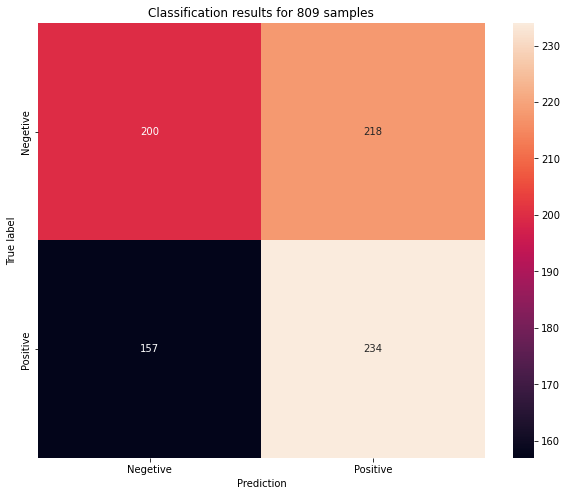

In [118]:
k = 5
clf = GaussianNB()
mean_GNB1_2,std_GNB1_2, y_test, y_pred = k_fold_validation(df2,k,clf,True)

print()
print(f"Average score: {mean_GNB1_2}")
print(f"Standard deviation of scores: {std_GNB1_2}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

accuracies : [0.5401730531520396, 0.5216316440049443, 0.522867737948084, 0.5216316440049443, 0.5179233621755254]

Average score: 0.5248454882571074
Standard deviation of scores: 0.008766686391345936


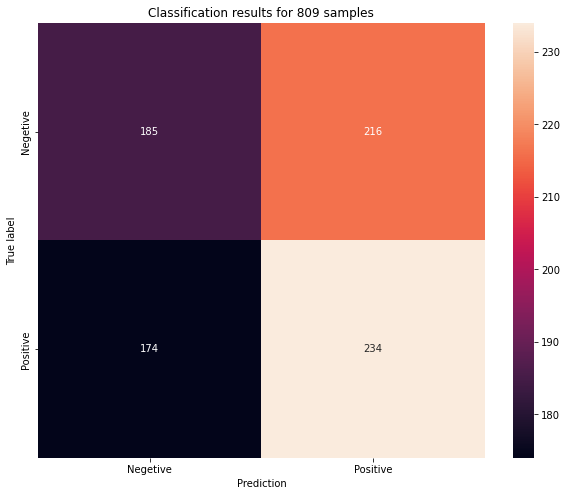

In [119]:
clf = GaussianNB()
mean_GNB2_2,std_GNB2_2, y_test, y_pred = k_fold_validation(df2,k,clf,False)

print()
print(f"Average score: {mean_GNB2_2}")
print(f"Standard deviation of scores: {std_GNB2_2}")

plot_confusion_mat(y_test,y_pred)

- LogisticRegression

with fisher feature selection :

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

accuracies : [0.5475896168108776, 0.5315203955500618, 0.5772558714462299, 0.5525339925834364, 0.5216316440049443]

Average score: 0.54610630407911
Standard deviation of scores: 0.021363336915679487


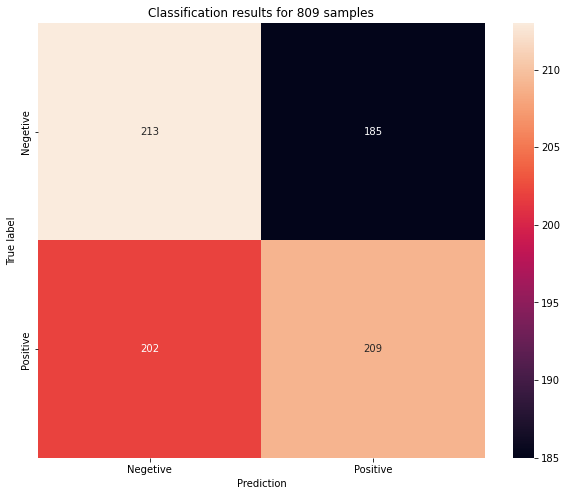

In [120]:
clf = LogisticRegression()
mean_LR1_2,std_LR1_2 , y_test, y_pred = k_fold_validation(df2,k,clf,True)
print()
print(f"Average score: {mean_LR1_2}")
print(f"Standard deviation of scores: {std_LR1_2}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

accuracies : [0.5797280593325093, 0.5488257107540173, 0.5686032138442522, 0.5698393077873919, 0.6118665018541409]

Average score: 0.5757725587144623
Standard deviation of scores: 0.023082213411762812


/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


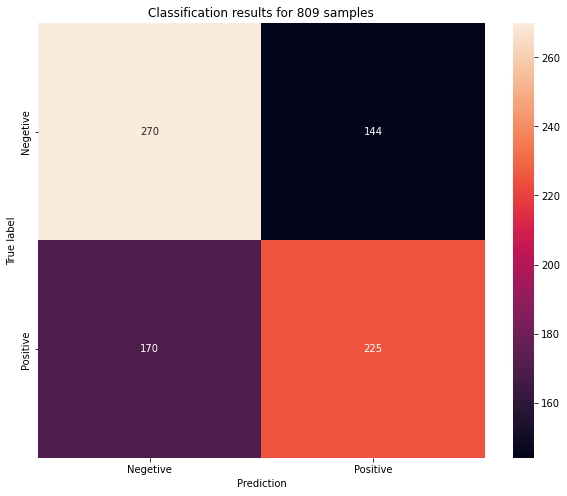

In [121]:
clf = LogisticRegression()
mean_LR2_2,std_LR2_2, y_test, y_pred = k_fold_validation(df2,k,clf,False)
print()
print(f"Average score: {mean_LR2_2}")
print(f"Standard deviation of scores: {std_LR2_2}")

plot_confusion_mat(y_test,y_pred)

- SVM

with Fisher feature selection :

accuracies : [0.5624227441285538, 0.5686032138442522, 0.553770086526576, 0.5562422744128553, 0.5797280593325093]

Average score: 0.5641532756489493
Standard deviation of scores: 0.010437494107581987


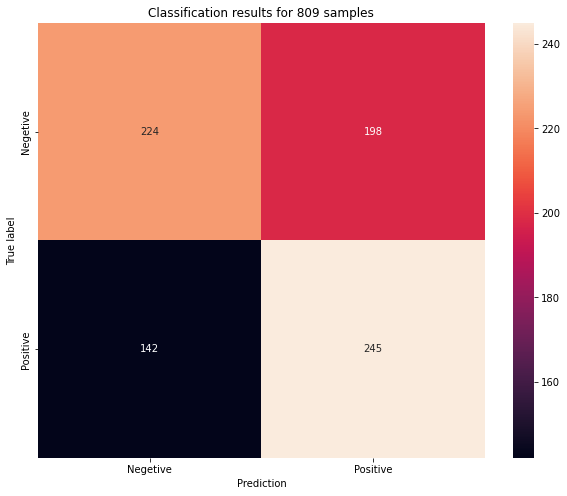

In [122]:
svm_clf = svm.SVC(kernel='linear')
mean_svm1_2,std_svm1_2 , y_test, y_pred= k_fold_validation(df2,k,svm_clf,True)
print()
print(f"Average score: {mean_svm1_2}")
print(f"Standard deviation of scores: {std_svm1_2}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

accuracies : [0.5784919653893696, 0.6044499381953028, 0.6106304079110012, 0.5686032138442522, 0.5772558714462299]

Average score: 0.5878862793572311
Standard deviation of scores: 0.018471231013614944


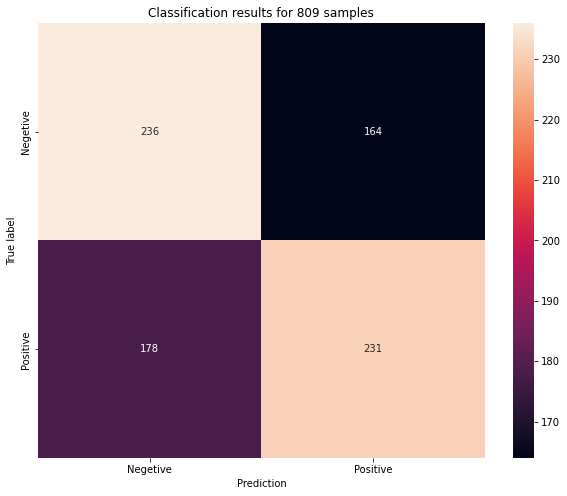

In [123]:
svm_clf = svm.SVC(kernel='linear')
mean_svm2_2,std_svm2_2, y_test, y_pred = k_fold_validation(df2,k,svm_clf,False)
print()
print(f"Average score: {mean_svm2_2}")
print(f"Standard deviation of scores: {std_svm2_2}")

plot_confusion_mat(y_test,y_pred)

- Random Forest

with Fisher feature selection :

accuracies : [0.7589616810877626, 0.7948084054388134, 0.8034610630407911, 0.8059332509270705, 0.7688504326328801]

Average score: 0.7864029666254636
Standard deviation of scores: 0.021237806274328357


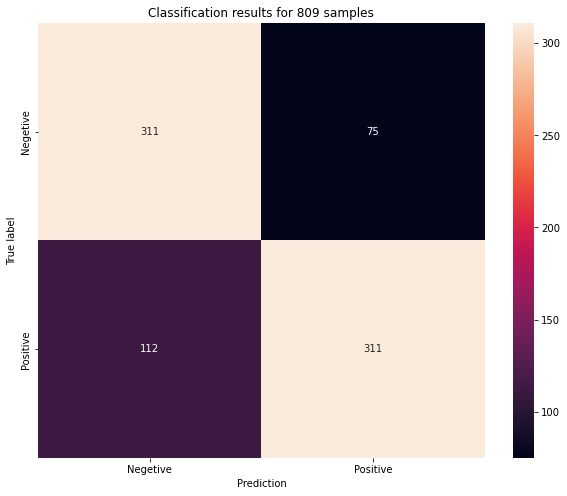

In [124]:
k = 5
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
mean_RF1_2,std_RF1_2, y_test, y_pred = k_fold_validation(df2,k,clf2,True)

print()
print(f"Average score: {mean_RF1_2}")
print(f"Standard deviation of scores: {std_RF1_2}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

accuracies : [0.7873918417799752, 0.8244746600741656, 0.7787391841779975, 0.8009888751545118, 0.8257107540173053]

Average score: 0.8034610630407911
Standard deviation of scores: 0.02128451836554088


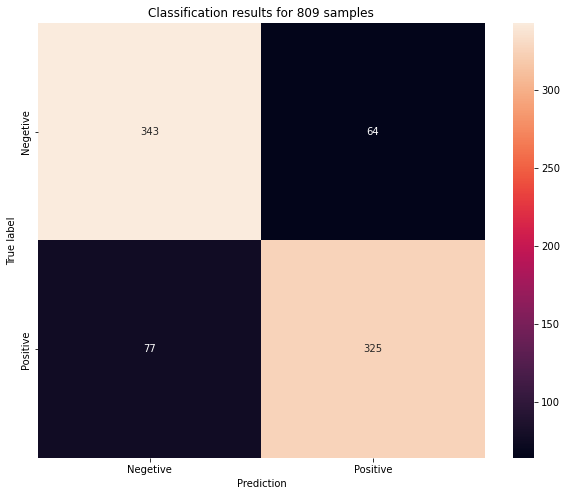

In [125]:
k = 5
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
mean_RF2_2,std_RF2_2, y_test, y_pred = k_fold_validation(df2,k,clf2,False)

print()
print(f"Average score: {mean_RF2_2}")
print(f"Standard deviation of scores: {std_RF2_2}")

plot_confusion_mat(y_test,y_pred)

---

## Classification using `PLV_feature` and ``PSD2_feature`` :

In [126]:
df1.tail()

,subject,epoch,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,Fz,...,PO3_gamma,PO4_gamma,PO5_gamma,PO6_gamma,PO7_gamma,PO8_gamma,Oz_gamma,O1_gamma,O2_gamma,valence
2689,25gyz,111.0,2.271080e-09,2.968526e-09,1.753954e-09,2.087373e-09,1.172443e-09,2.310567e-09,1.030154e-09,4.393005e-10,...,0.142904,0.109496,0.150095,0.191852,0.138720,0.289087,0.235921,0.194589,0.351046,0
2690,20wrq,2.0,5.582912e-10,1.821231e-09,3.139921e-09,4.775027e-10,1.553361e-10,3.365659e-09,2.313461e-09,1.219581e-10,...,0.250631,0.272911,0.494336,0.347835,0.390473,0.495023,0.324178,0.416491,0.411214,0
2691,20wrq,70.0,6.147528e-10,3.459708e-09,2.438994e-09,5.451489e-10,1.876568e-10,7.453208e-09,2.296551e-09,1.154566e-10,...,0.226976,0.193152,0.448575,0.247575,0.419624,0.375084,0.411533,0.470085,0.381001,0
2692,12wlz,31.0,2.013909e-10,2.555419e-10,6.476487e-10,1.942568e-10,8.532420e-11,2.315997e-10,8.686020e-10,6.572898e-11,...,0.141821,0.142655,0.193941,0.148642,0.236979,0.228708,0.155104,0.154496,0.264984,0
2693,12wlz,42.0,2.709082e-10,2.768044e-10,5.953889e-10,1.316831e-10,7.349616e-11,1.687764e-10,4.394220e-10,6.742356e-11,...,0.128064,0.132215,0.135090,0.147631,0.186872,0.203380,0.140769,0.126749,0.197021,0


In [127]:
df2.tail()

,Fpz_MPLV,Fp1_MPLV,Fp2_MPLV,AF3_MPLV,AF4_MPLV,AF7_MPLV,AF8_MPLV,Fz_MPLV,F1_MPLV,F2_MPLV,...,PO5_NE,PO6_NE,PO7_NE,PO8_NE,Oz_NE,O1_NE,O2_NE,subject,epoch,valence
2689,0.181544,0.202939,0.164352,0.216674,0.199571,0.262834,0.223008,0.202917,0.214230,0.226451,...,17.787958,17.822441,17.787958,17.796579,18.082211,18.165599,17.983853,06zhy,74.0,0
2690,0.133784,0.120066,0.097683,0.180227,0.252311,0.131792,0.114411,0.177437,0.227583,0.244183,...,15.847701,15.718966,16.021839,15.985632,15.622989,15.707471,15.782759,20wrq,8.0,0
2691,0.196074,0.199815,0.104653,0.308895,0.176354,0.200760,0.118159,0.273449,0.293020,0.264379,...,18.435961,18.303202,18.399754,18.407800,18.359524,18.423317,18.400328,22wf,90.0,0
2692,0.166898,0.181593,0.125323,0.131913,0.161478,0.261630,0.115431,0.194059,0.130693,0.218692,...,15.539819,15.609360,15.615107,15.667980,15.749589,15.632348,15.645567,12wlz,54.0,0
2693,0.141491,0.141563,0.128338,0.061037,0.065070,0.120899,0.129599,0.170068,0.170527,0.146031,...,11.730542,11.719048,11.967323,11.689737,12.093760,12.113793,11.925369,25gyz,103.0,0


In [128]:
df2 = df2.drop(['valence','subject','epoch'], axis=1)
concat_df = pd.concat([df1, df2], axis=1)
concat_df.tail()


,subject,epoch,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,Fz,...,POz_NE,PO3_NE,PO4_NE,PO5_NE,PO6_NE,PO7_NE,PO8_NE,Oz_NE,O1_NE,O2_NE
2689,25gyz,111.0,2.271080e-09,2.968526e-09,1.753954e-09,2.087373e-09,1.172443e-09,2.310567e-09,1.030154e-09,4.393005e-10,...,18.096579,17.960865,18.516694,17.787958,17.822441,17.787958,17.796579,18.082211,18.165599,17.983853
2690,20wrq,2.0,5.582912e-10,1.821231e-09,3.139921e-09,4.775027e-10,1.553361e-10,3.365659e-09,2.313461e-09,1.219581e-10,...,15.610345,15.741954,15.695977,15.847701,15.718966,16.021839,15.985632,15.622989,15.707471,15.782759
2691,20wrq,70.0,6.147528e-10,3.459708e-09,2.438994e-09,5.451489e-10,1.876568e-10,7.453208e-09,2.296551e-09,1.154566e-10,...,18.294581,18.341133,18.216995,18.435961,18.303202,18.399754,18.407800,18.359524,18.423317,18.400328
2692,12wlz,31.0,2.013909e-10,2.555419e-10,6.476487e-10,1.942568e-10,8.532420e-11,2.315997e-10,8.686020e-10,6.572898e-11,...,16.320854,16.320854,15.738095,15.539819,15.609360,15.615107,15.667980,15.749589,15.632348,15.645567
2693,12wlz,42.0,2.709082e-10,2.768044e-10,5.953889e-10,1.316831e-10,7.349616e-11,1.687764e-10,4.394220e-10,6.742356e-11,...,12.497209,11.904680,11.993186,11.730542,11.719048,11.967323,11.689737,12.093760,12.113793,11.925369


In [129]:
X = concat_df.drop("valence", axis=1)
y = concat_df["valence"]
# Apply oversampling to balance the dataframe
oversampler = RandomOverSampler()
X_balanced, y_balanced = oversampler.fit_resample(X, y)

# Create a new balanced dataframe
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)
concat_df =  df_balanced

-  Gaussian naive bayes 

with fisher feature selection :

accuracies : [0.5203955500618047, 0.5822002472187886, 0.5686032138442522, 0.5747836835599506, 0.5723114956736712]

Average score: 0.5636588380716935
Standard deviation of scores: 0.024690957176066966


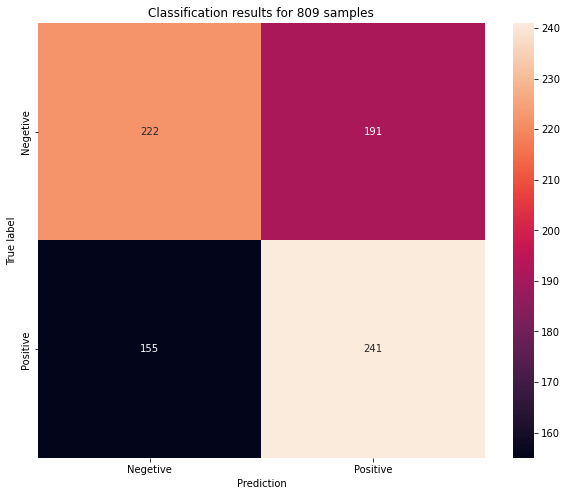

In [130]:
k = 5
clf = GaussianNB()
mean_GNB1_3,std_GNB1_3, y_test, y_pred = k_fold_validation(concat_df,k,clf,True)

print()
print(f"Average score: {mean_GNB1_3}")
print(f"Standard deviation of scores: {std_GNB1_3}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

accuracies : [0.6081582200247219, 0.6131025957972805, 0.5970333745364648, 0.61557478368356, 0.588380716934487]

Average score: 0.6044499381953028
Standard deviation of scores: 0.011463063653270343


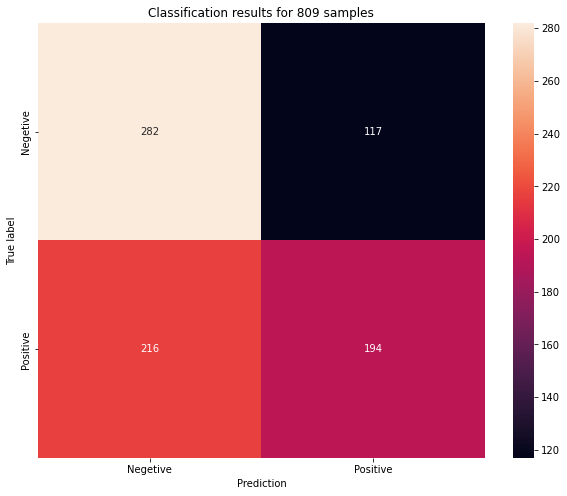

In [131]:
clf = GaussianNB()
mean_GNB2_3,std_GNB2_3, y_test, y_pred = k_fold_validation(concat_df,k,clf,False)

print()
print(f"Average score: {mean_GNB2_3}")
print(f"Standard deviation of scores: {std_GNB2_3}")

plot_confusion_mat(y_test,y_pred)

- LogisticRegression

with fisher feature selection :

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

accuracies : [0.6452410383189122, 0.646477132262052, 0.6365883807169345, 0.5995055624227441, 0.6081582200247219]

Average score: 0.627194066749073
Standard deviation of scores: 0.02187921196986596


/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


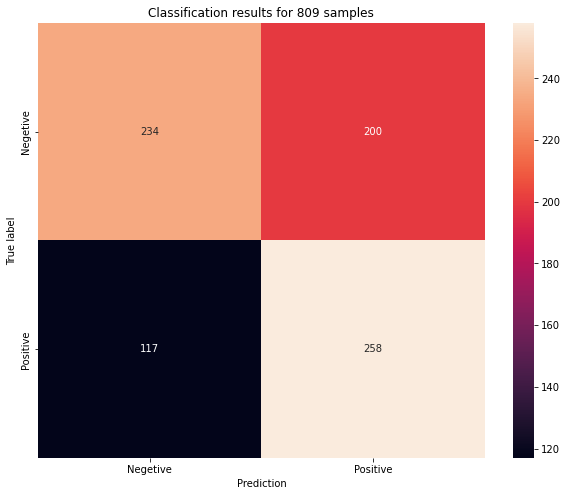

In [132]:
clf = LogisticRegression()
mean_LR1_3,std_LR1_3 , y_test, y_pred = k_fold_validation(concat_df,k,clf,True)
print()
print(f"Average score: {mean_LR1_3}")
print(f"Standard deviation of scores: {std_LR1_3}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

accuracies : [0.6501854140914709, 0.61557478368356, 0.6613102595797281, 0.6044499381953028, 0.6526576019777504]

Average score: 0.6368355995055623
Standard deviation of scores: 0.025141676780666262


/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


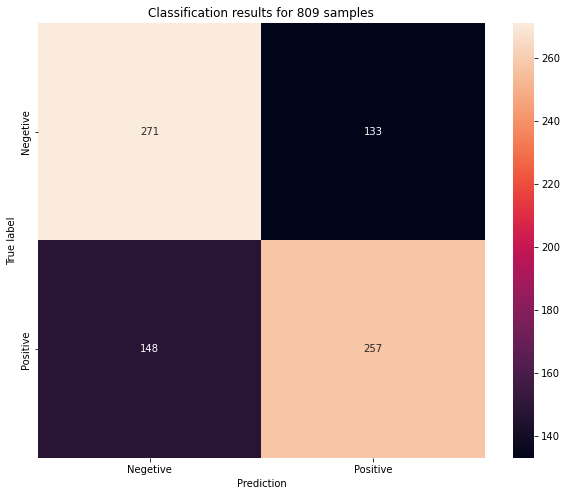

In [133]:
clf = LogisticRegression()
mean_LR2_3,std_LR2_3, y_test, y_pred = k_fold_validation(concat_df,k,clf,False)
print()
print(f"Average score: {mean_LR2_3}")
print(f"Standard deviation of scores: {std_LR2_3}")

plot_confusion_mat(y_test,y_pred)

- SVM

with Fisher feature selection :

accuracies : [0.6266996291718171, 0.6279357231149567, 0.6007416563658838, 0.6427688504326329, 0.6353522867737948]

Average score: 0.626699629171817
Standard deviation of scores: 0.015877914188708434


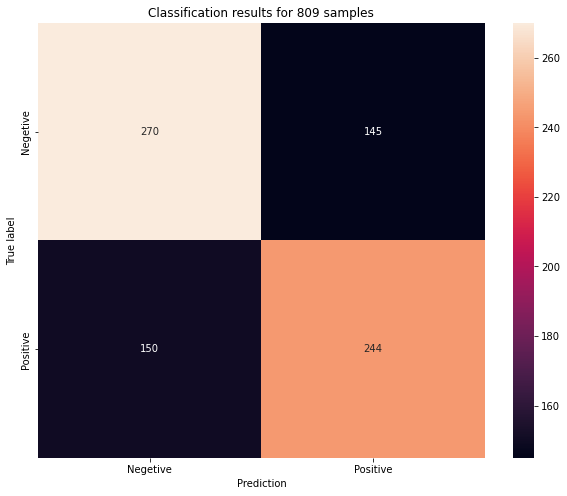

In [134]:
svm_clf = svm.SVC(kernel='linear')
mean_svm1_3,std_svm1_3 , y_test, y_pred= k_fold_validation(concat_df,k,svm_clf,True)
print()
print(f"Average score: {mean_svm1_3}")
print(f"Standard deviation of scores: {std_svm1_3}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

accuracies : [0.6452410383189122, 0.6563658838071693, 0.6674907292954264, 0.6353522867737948, 0.6687268232385661]

Average score: 0.6546353522867737
Standard deviation of scores: 0.014378062816905145


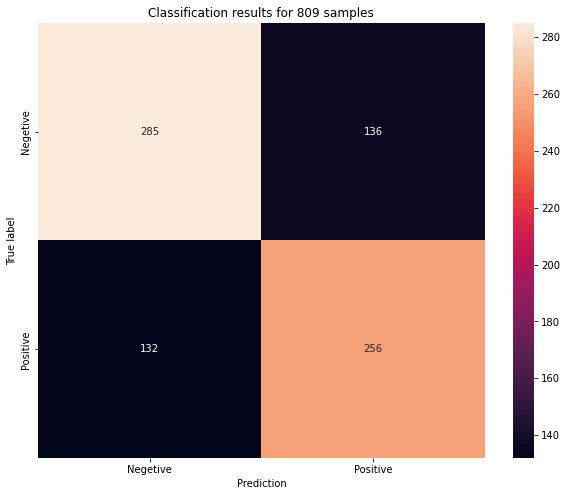

In [135]:
svm_clf = svm.SVC(kernel='linear')
mean_svm2_3,std_svm2_3, y_test, y_pred = k_fold_validation(concat_df,k,svm_clf,False)
print()
print(f"Average score: {mean_svm2_3}")
print(f"Standard deviation of scores: {std_svm2_3}")

plot_confusion_mat(y_test,y_pred)

- Random Forest

with Fisher feature selection :

accuracies : [0.8071693448702101, 0.7713226205191595, 0.788627935723115, 0.792336217552534, 0.7713226205191595]

Average score: 0.7861557478368356
Standard deviation of scores: 0.015214503862906256


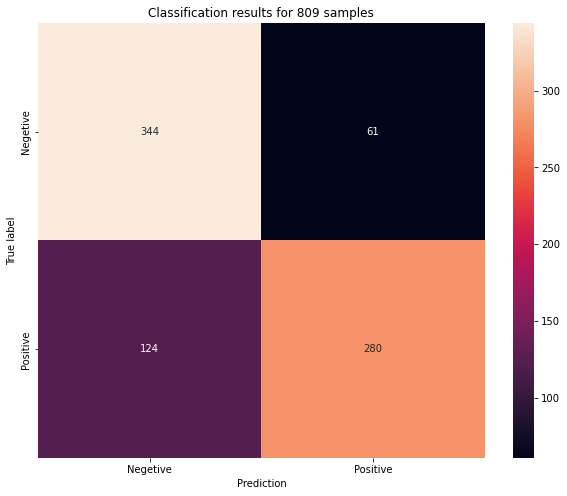

In [136]:
k = 5
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
mean_RF1_3,std_RF1_3, y_test, y_pred = k_fold_validation(concat_df,k,clf2,True)

print()
print(f"Average score: {mean_RF1_3}")
print(f"Standard deviation of scores: {std_RF1_3}")

plot_confusion_mat(y_test,y_pred)

with Random Forest feature selection :

accuracies : [0.8294190358467244, 0.8158220024721878, 0.823238566131026, 0.8195302843016069, 0.8182941903584673]

Average score: 0.8212608158220025
Standard deviation of scores: 0.00528782438472374


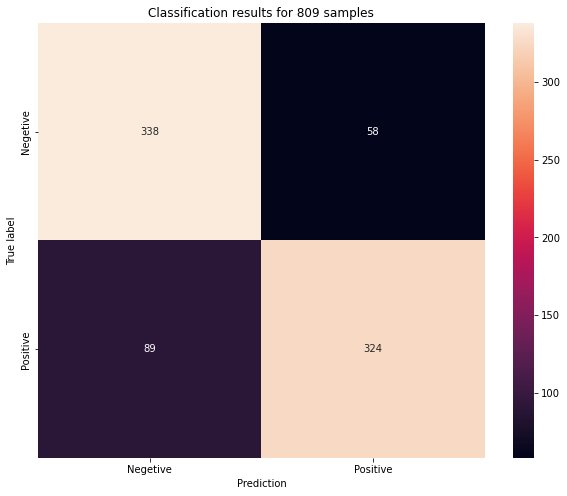

In [137]:
k = 5
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
mean_RF2_3,std_RF2_3, y_test, y_pred = k_fold_validation(concat_df,k,clf2,False)

print()
print(f"Average score: {mean_RF2_3}")
print(f"Standard deviation of scores: {std_RF2_3}")

plot_confusion_mat(y_test,y_pred)

---

## results :

In [140]:
results = pd.DataFrame([
                        [mean_GNB1,mean_GNB1_1,mean_GNB1_2,mean_GNB1_3],
                        [mean_GNB2,mean_GNB2_1,mean_GNB2_2,mean_GNB2_3],
                        [mean_LR1,mean_LR1_1,mean_LR1_2,mean_LR1_3],
                        [mean_LR2,mean_LR2_1,mean_LR2_2,mean_LR2_3],
                        [mean_svm1,mean_svm1_1,mean_svm1_2,mean_svm1_3],
                        [mean_svm2,mean_svm2_1,mean_svm2_2,mean_svm2_3],
                        [mean_RF1,mean_RF1_1,mean_RF1_2,mean_RF1_3],
                        [mean_RF2,mean_RF2_1,mean_RF2_2,mean_RF2_3],
                        ])

results.index=['GNB_fisher_acc','GNB_RF_acc','LR_fisher_acc','LR_RF_acc',
                              'SVM_fisher_acc','SVM_RF_acc',"Random Forest_fisher_acc","Random Forest_RF_acc"]
results.columns=['PSD feature1','PSD feature2','PLV feature','PLV & PSD2']

In [141]:
results

,PSD feature1,PSD feature2,PLV feature,PLV & PSD2
GNB_fisher_acc,0.564153,0.574784,0.537454,0.563659
GNB_RF_acc,0.582695,0.606922,0.524845,0.604450
LR_fisher_acc,0.600989,0.631397,0.546106,0.627194
LR_RF_acc,0.637577,0.654388,0.575773,0.636836
SVM_fisher_acc,0.613597,0.641780,0.564153,0.626700
SVM_RF_acc,0.638072,0.653646,0.587886,0.654635
Random Forest_fisher_acc,0.823980,0.812114,0.786403,0.786156
Random Forest_RF_acc,0.841038,0.829419,0.803461,0.821261


# More analysis :

### **binary classification problem complexity** in our dataset :


The classification problem’s complexity assessment is an essential element of
many topics in the supervised learning domain. It plays a significant role in
meta-learning – becoming the basis for determining meta-attributes or multi criteria optimization – allowing the evaluation of the training set resampling
without needing to rebuild the recognition model.

Within our the measure, six categories are distinguished :

- $Feature-based$ containing $F1, F1v, F2, F3,$ and $F4$ measures,
- $Linearity$ containing $L1, L2,$ and $L3$ measures,
- $Neighborhood$ with $N1, N2, N3, N4, T1,$ and $LSC$ measures,
- $Network$ containing $density, ClsCoef,$ and $Hubs$ measures,
- $Dimensionality$ containing $T2, T3,$ and $T4$ measures,
- $Class-imbalance$ containing $C1$ and $C2$ measures.


![BC.png](BC.png)

## $Feature-based$ measures

The measures describe the ability of features to separate classes in the classification problem. They analyze features separately or evaluate how attributes
work together

#### $F1$ Maximum Fisher’s discriminant ratio.
The measure describes the overlap of feature values in each class. The
inverse of the original formulation, taking into account the most significant discriminant ratio, is taken into account, the same as in ECoL
package.
#### $F1v$ Directional vector maximum Fisher’s discriminant ratio.
The measure computes projection that maximizes class separation by
directional Fisher’s criterion.
#### $F2$ Volume of overlapping region
The measure describes the overlap of the feature values within the
classes. It is determined by the minimum and maximum values of
features in each class. The overlap is then calculated and normalized
by the range of values in each class.
#### $F3$ Maximum individual feature efficiency
The measure describes the efficiency of each feature in the separation
of classes. 
#### $F4$ Collective feature efficiency
The measure describes the features synergy. The instances separated by
the most discriminant attribute that was not used already are excluded
from further analysis. The process continues until all instances are
classified, or all features are used. The measure is calculated according
to the number of instances in the overlapping region and the total
number of samples.

 ## $Linearity$ measures

The measures evaluate the level of problem class linear separation. The
measures use Linear Support Vector Machines (svm) classifier.

#### $L1$ Sum of the error distance by linear programming
The measure calculates the distance of incorrectly classified samples
from the svm hyperplane.
#### $L2$ Error rate of linear classifier
The measure is described by the error rate of the Linear svm classifier
within the dataset.
#### $L3$ Non-linearity of linear classifier The measure is described by the
classifier’s error rate on synthesized points of the dataset. The synthetic
points are obtained by linearly interpolating instances of each class.
The class of original examples determines the label of an augmented
point, and the number of artificial points is equal to the original dataset
size

##  $Neighborhood$ measures

The measures analyze the neighborhood of instances in a feature space.
Neighbors of each sample are established based on the distance between
problem instances.


#### $N1$ Fraction of borderline points
The Minimum Spanning Three is generated over input instances in
order to obtain this measure. The value is computed by calculating the
number of edges in the mst between examples of different classes over
a total number of samples.
#### $N2$ Ratio of intra/extra class NN distance
The measure depends on the distances of each problem instance to
its nearest neighbor of the same class and the distance to the nearest
neighbor of a different class. According to the proportions of those
values, the final value is calculated.
#### $N3$ Error rate of NN classifier
The measure is determined by the error rate of the One Nearest Neighbor Classifier in the Leave One Out evaluation protocol.
#### $N4$ Calculates the Non-linearity of NN classifier (N4) metric
The measure is determined by the error rate of the k-Nearest Neighbor
Classifier on synthetic points, generated by linearly interpolating original instances. The classifier is fitted on original points and evaluated
on synthetic instances.
#### $T1$ Fraction of hyperspheres covering data
The measure is defined by the number of hyperspheres needed to cover
the data divided by a number of instances. First, a hypersphere is
generated for each problem sample. A sample lies in the center of the
hypersphere. Its radius is dependent on the distance to the instance
of another class. The hyperspheres are eliminated if a different one
already covers the center instance. The elimination starts from the
hyperspheres with the largest radius and continues to the ones with a
smaller radius. The hyperspheres that were not eliminated are taken
into account during the calculation of complexity

#### $LSC$ Local set average cardinality (LSC)
The measure is dependent on the distances between instances and the
distances to the instances’ nearest enemies – the nearest sample of the
opposite class. The number of cases that lie closer to the sample than
its closest enemy is considered during the calculation.

## $Network$ measures
The measures consider the instances as the vertices of the graph. All measures of this category generate an epsilon-Nearest Neighbours graph. The
epsilon value is set to 0.15, same as in the ECoL package. The edges are
selected based on the Gower distance between samples, normalized to the
range between 0 and 1. The edge is placed between the points if a normalized Gower distance is smaller than 0.15. Edges between instances of distinct
classes are removed

#### $density$ Density metric
The measure calculates the number of edges in the final graph divided
by the total possible number of edges.
#### $clsCoef$ Clustering Coefficient metric
For the purpose of obtaining this measure, the neighborhood of each
vertex is calculated, i.e., the instances directly connected to it. Then,
the number of edges between the sample’s neighbors is calculated and
divided by the maximum possible number of edges between them. The
final measure is calculated based on the neighborhood of each point in
the dataset.
#### $hubs$ Hubs metric
For the purpose of obtaining this measure, the neighborhood of each
vertex is obtained. The measure scores each sample by the number of
connections to neighbors, weighted by the number of connections the
neighbors have.


### $Dimensionality$ measures
The measures analyze the relation between the number of features and the
number of instances in the dataset.

#### $T2$ Average number of features per dimension
For the purpose of obtaining this measure, the number of dimensions
describing the dataset is divided by the number of instances.
#### $T3$ Average number of PCA dimensions per points
To obtain this measure, first, the number of PCA components needed
to represent 95% of data variability is calculated. Then, the value is
divided by the instance number in the dataset.
#### $T4$ Ration of the PCA dimension to the original dimension
To obtain this measure, the number of PCA components needed to
represent 95% of data variability is divided by the original number of
dimensions. This measure describes the proportion of relevant dimensions in the dataset.

### $Class-imbalance$ measures
The Class Imbalance measures evaluate the dataset based on the degree of
data imbalance.


#### $C1$ Entropy of Class Proportions The measure is obtained based on
the proportion of each class’s samples divided by the total number of
samples.
#### $C2$ Imbalance Ratio
The measure is obtained based on the proportion of each class’s samples
divided by a number of opposite class samples

In [7]:
import problexity as px

In [10]:
df1 = pd.read_csv('PSD_feature2_dataframe.csv')
df2 = pd.read_csv('PLV_feature_dataframe.csv')
df2 = df2.drop(['valence','subject','epoch'], axis=1)
concat_df = pd.concat([df1, df2], axis=1)

X_ = concat_df.drop(['valence','subject','epoch'], axis=1)
y_ = concat_df['valence']


In [11]:
# Initialize CoplexityCalculator with default parametrization
cc = px.ComplexityCalculator()
# Fit model with data
cc.fit(X_,y_)

/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/amir/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [12]:
cc._metrics()

['f1',
 'f1v',
 'f2',
 'f3',
 'f4',
 'l1',
 'l2',
 'l3',
 'n1',
 'n2',
 'n3',
 'n4',
 't1',
 'lsc',
 'density',
 'clsCoef',
 'hubs',
 't2',
 't3',
 't4',
 'c1',
 'c2']

The `problem difficulty score` can be obtained as a single scalar measure :

In [13]:
cc.score()

0.41240285123501974

problem difficulty score of our dataset is fairly twice the the **IRIS** dataset !!!

In [14]:
cc.report()

{'n_samples': 2043,
 'n_features': 472,
 'score': 0.412,
 'complexities': {'f1': 0.962,
  'f1v': 0.251,
  'f2': 0.0,
  'f3': 0.983,
  'f4': 0.0,
  'l1': 0.25,
  'l2': 0.243,
  'l3': 0.31,
  'n1': 0.2,
  'n2': 0.547,
  'n3': 0.394,
  'n4': 0.363,
  't1': 0.927,
  'lsc': 0.999,
  'density': 0.982,
  'clsCoef': 0.22,
  'hubs': 0.949,
  't2': 0.231,
  't3': 0.0,
  't4': 0.002,
  'c1': 0.075,
  'c2': 0.184},
 'n_classes': 2,
 'classes': 2,
 'prior_probability': array([0.34067548, 0.65932452])}

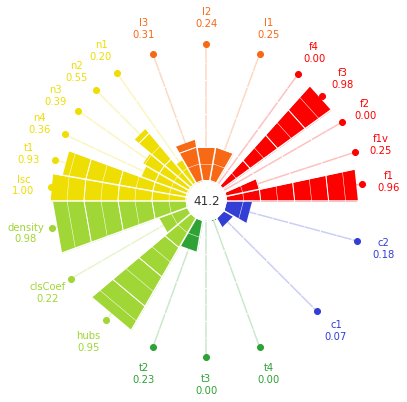

In [17]:
fig = plt.figure(figsize=(7,7))
# Generate plot describing the dataset
cc.plot(fig, (1,1,1));